In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import myutils
import Alarms



In [2]:
#visual settings
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

sns.set(style='whitegrid',palette='muted',font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [3]:
data1 = pd.read_csv('Data\Processed\Aulaga_clean.csv')
#data1 = pd.read_csv('Data\Processed\HACCP.csv')
temp = pd.read_csv('Data\Processed\Temp.csv')
check = pd.read_csv('Data\Processed\S3S4.csv')


In [4]:
# Analysis only for September 2020 and for San Lorenzo Supermarket
data1['Timetag'] = pd.to_datetime(data1['Timetag'])
#data1['Value'] = data1['Value'].apply(lambda x: float(x.split()[0].replace(',', '.')))
#data= data1[(data1['SiteID']==89259) & (data1['Timetag']<='2020-09-30')]
data =data1[data1['Timetag']>='2020-09-01']
data = data[['Timetag','AssetName','DataValue']]
data.head()



Timetag          AssetName  DataValue
0 2020-09-01 00:05:00  011:CB CONG Hielo      -17.9
1 2020-09-01 00:05:00     012:I CONG PLS      -19.6
2 2020-09-01 00:05:00   013:I CONG Carne      -19.8
3 2020-09-01 00:05:00    014:CB CONG Ave      -13.8
4 2020-09-01 00:05:00    016:CB CONG PLS      -17.7

# S3 & S4 data

In [5]:
check.head()

Unnamed: 0  SiteID                     SiteName  AssetID  \
0           0   89259  9338 Valle San Lorenzo (SM)    89602   
1           1   89259  9338 Valle San Lorenzo (SM)    89602   
2           2   89259  9338 Valle San Lorenzo (SM)    89602   
3           3   89259  9338 Valle San Lorenzo (SM)    89602   
4           4   89259  9338 Valle San Lorenzo (SM)    89602   

              AssetName  PointID                               PointName  \
0  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
1  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
2  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
3  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   
4  006:I.CONGELADOS 1.1   548540  006:I.CONGELADOS 1.1:  u16 S4 Air Temp   

  DataValue                  Timetag Units PropertyName  
0     -31,3  2021-08-23 19:15:00.000    °C    GLOBAL_ID  
1     -31,2  2021-08-23 18:25:00.000    °C    GLOBAL_ID  
2       -31  2021-02-19 06:15:00.000    °C    GLOBAL_ID  
3     -30,9  2021-08-23 19:45:00.000    °C    GLOBAL_ID  
4     -30,9  2021-08-24 18:45:00.000    °C    GLOBAL_ID

In [6]:
test_check = check[(check['PropertyName']=='GLOBAL_ID') & (check['SiteID']==89247)].sort_values(ascending=True,by='Timetag')

test_check = test_check[['Timetag','AssetName','PointName','DataValue']]
test_check['Timetag'] = pd.to_datetime(test_check['Timetag'])

test_check['DataValue'] = test_check['DataValue'].apply(lambda x: float(x.split()[0].replace(',', '.')))

#test_check = test_check.groupby(['Timetag','PointName'])['DataValue'].mean().unstack('PointName')
test_check = test_check[(test_check['Timetag']>='2020-09-01')]
test_check

Timetag              AssetName  \
8368127 2020-09-01 00:05:00    019:CB CONG Pescado   
8231201 2020-09-01 00:05:00        014:CB CONG Ave   
8369417 2020-09-01 00:05:00     018:I CONG Verdura   
8552536 2020-09-01 00:05:00       017:I CONG PLS 2   
8442638 2020-09-01 00:05:00         012:I CONG PLS   
...                     ...                    ...   
6439814 2021-08-30 23:55:00    073:V Charcuteria 1   
6588428 2021-08-30 23:55:00     069:CSM Carniceria   
6805467 2021-08-30 23:55:00         059:M Quesos 1   
6669953 2021-08-30 23:55:00  023:I CONG Pescaderia   
6173247 2021-08-30 23:55:00    058:M Charcuteria 2   

                                       PointName  DataValue  
8368127    019:CB CONG Pescado:  u16 S4 Air Temp      -23.3  
8231201        014:CB CONG Ave:  u16 S4 Air Temp      -16.2  
8369417     018:I CONG Verdura:  u16 S4 Air Temp      -25.1  
8552536       017:I CONG PLS 2:  u16 S4 Air Temp      -21.3  
8442638         012:I CONG PLS:  u16 S4 Air Temp      -22.4  
...                                          ...        ...  
6439814    073:V Charcuteria 1:  u16 S4 Air Temp       11.8  
6588428     069:CSM Carniceria:  u16 S4 Air Temp        0.8  
6805467         059:M Quesos 1:  u16 S4 Air Temp       11.1  
6669953  023:I CONG Pescaderia:  u16 S4 Air Temp      -18.9  
6173247    058:M Charcuteria 2:  u16 S4 Air Temp       -0.2  

[1718856 rows x 4 columns]

# Temperature

In [7]:
temp.head()

Unnamed: 0                                                 ID  SiteID  \
0           0      8924789435076:V Aves:  u69 Sair TempLOWTEMP-3   89247   
1           1      8924789435076:V Aves:  u69 Sair TempHIGHTEMP8   89247   
2           2  8924789454019:CB CONG Pescado:  u17 Ther AirLO...   89247   
3           3  8924789454019:CB CONG Pescado:  u17 Ther AirHI...   89247   
4           4  8924789448083:M Fruta-Verdura 1:  u17 Ther Air...   89247   

       SiteName  AssetID              AssetName  \
0  Dinosol 9303    89435             076:V Aves   
1  Dinosol 9303    89435             076:V Aves   
2  Dinosol 9303    89454    019:CB CONG Pescado   
3  Dinosol 9303    89454    019:CB CONG Pescado   
4  Dinosol 9303    89448  083:M Fruta-Verdura 1   

                          ParameterName  ParameterValue ParameterUnits  \
0            076:V Aves:  u69 Sair Temp              -3             °C   
1            076:V Aves:  u69 Sair Temp               8             °C   
2    019:CB CONG Pescado:  u17 Ther Air             -21             °C   
3    019:CB CONG Pescado:  u17 Ther Air             -15             °C   
4  083:M Fruta-Verdura 1:  u17 Ther Air               1             °C   

  PropertyName  
0      LOWTEMP  
1     HIGHTEMP  
2      LOWTEMP  
3     HIGHTEMP  
4      LOWTEMP

In [8]:
temp = temp[temp['SiteID']==89247].pivot_table(values='ParameterValue',index='AssetName',columns='PropertyName')

In [9]:
conditions = [
    (temp['LOWTEMP'] == -21), (temp['LOWTEMP'] ==-3 ),
    (temp['LOWTEMP'] == 1), (temp['LOWTEMP'] == 0),
    (temp['LOWTEMP'] == 6)
   
    ]

# create a list of the values we want to assign for each condition
values = ['freezer', 'fish/meat', 'fruits', 'milk/charcuterie','charniceria']

# create a new column and use np.select to assign values to it using our lists as arguments
temp['Group'] = np.select(conditions, values)

In [11]:
#temp.to_csv('temp_groups.csv')


In [12]:
temp

PropertyName           HIGHTEMP  LOWTEMP             Group
AssetName                                                 
002:C CONGELADOS            -15      -21           freezer
011:CB CONG Hielo           -15      -21           freezer
012:I CONG PLS              -15      -21           freezer
013:I CONG Carne            -15      -21           freezer
014:CB CONG Ave             -15      -21           freezer
015:I CONG Helado           -15      -21           freezer
016:CB CONG PLS             -15      -21           freezer
017:I CONG PLS 2            -15      -21           freezer
018:I CONG Verdura          -15      -21           freezer
019:CB CONG Pescado         -15      -21           freezer
023:I CONG Pescaderia       -15      -21           freezer
031:C Pescado                 7       -3         fish/meat
032:C Carniceria              8       -3         fish/meat
033:O Carniceria             21        6       charniceria
034:C Charcuteria            10        0  milk/charcuterie
035:O Charcuteria            21        6       charniceria
036:C Fruta y Verdura        12        1            fruits
037:C PLS                    10        0  milk/charcuterie
038:C Basura                 18        1            fruits
039:C Panaderia              10        0  milk/charcuterie
057:M Charcuteria 1          10        0  milk/charcuterie
058:M Charcuteria 2          10        0  milk/charcuterie
059:M Quesos 1               10        0  milk/charcuterie
060:CSM Quesos               10        0  milk/charcuterie
061:SM Charcuteria 1         10        0  milk/charcuterie
062:SM Quesos                10        0  milk/charcuterie
063:CSM Charcuteria          10        0  milk/charcuterie
064:SM Quesos 2              10        0  milk/charcuterie
065:SM Quesos 3              10        0  milk/charcuterie
066:CSM PLS                  10        0  milk/charcuterie
067:SM PLS                   10        0  milk/charcuterie
069:CSM Carniceria            8       -3         fish/meat
070:SM Carniceria 1           8       -3         fish/meat
071:SM Carniceria 2           8       -3         fish/meat
072:V Quesos                 10        0  milk/charcuterie
073:V Charcuteria 1          10        0  milk/charcuterie
074:V Charcuteria 2          10        0  milk/charcuterie
075:V Carniceria              8       -3         fish/meat
076:V Aves                    8       -3         fish/meat
077:M Pescaderia              7       -3         fish/meat
078:M Lacteos 1              10        0  milk/charcuterie
079:M Lacteos 2              10        0  milk/charcuterie
080:M Lacteos 3              10        0  milk/charcuterie
081:M Lacteos 4              10        0  milk/charcuterie
082:M Bebidas                13        3                 0
083:M Fruta-Verdura 1        12        1            fruits
084:M Fruta-Verdura 2        12        1            fruits

# New data table

In [13]:
#merge temperature and data from lorezno
data_merge = pd.merge(data, temp, left_on = 'AssetName', right_index=True)

In [14]:
assert len(data_merge)>0

In [15]:
conditions = [
    (data_merge['DataValue'] < data_merge['LOWTEMP']),
    (data_merge['DataValue'] > data_merge['HIGHTEMP']), 
    (data_merge['DataValue'] >= data_merge['LOWTEMP'])
     & (data_merge['DataValue'] <= data_merge['HIGHTEMP'])
    ]
values = [-1, 1, 0]
data_merge['Defrost'] = np.select(conditions, values)

In [16]:
#Choose only relevant columns (Check whether the same AssetID are across the stores)
selected = data_merge[['AssetName','DataValue','Timetag','Defrost']].loc[data_merge['Group']=='milk/charcuterie'].sort_values(ascending=True,by='Timetag')#.set_index('Timetag')
selected.head(10)

AssetName  DataValue             Timetag  Defrost
9    057:M Charcuteria 1        3.7 2020-09-01 00:05:00        0
14         062:SM Quesos        0.5 2020-09-01 00:05:00        0
24   073:V Charcuteria 1        3.8 2020-09-01 00:05:00        0
26       078:M Lacteos 1        4.6 2020-09-01 00:05:00        0
13  061:SM Charcuteria 1        8.9 2020-09-01 00:05:00        0
19            067:SM PLS        1.1 2020-09-01 00:05:00        0
27       079:M Lacteos 2        5.1 2020-09-01 00:05:00        0
12        060:CSM Quesos        6.3 2020-09-01 00:05:00        0
29       081:M Lacteos 4        5.8 2020-09-01 00:05:00        0
11        059:M Quesos 1        3.7 2020-09-01 00:05:00        0

In [17]:
check_merge=pd.merge(test_check, temp, left_on = 'AssetName', right_index=True)
check_freezer = check_merge[check_merge['Group']=='milk/charcuterie']
check_freezer = check_freezer[['Timetag','AssetName','PointName','DataValue']]

In [18]:
check_freezer

Timetag            AssetName  \
8558037 2020-09-01 00:05:00         072:V Quesos   
8986730 2020-09-01 00:15:00         072:V Quesos   
8743683 2020-09-01 00:25:00         072:V Quesos   
8610665 2020-09-01 00:35:00         072:V Quesos   
8723834 2020-09-01 00:45:00         072:V Quesos   
...                     ...                  ...   
6809368 2021-08-30 23:35:00      078:M Lacteos 1   
6732611 2021-08-30 23:45:00      078:M Lacteos 1   
6623746 2021-08-30 23:55:00      078:M Lacteos 1   
8697634 2020-11-13 12:50:00  074:V Charcuteria 2   
6826505 2021-05-07 08:00:00  074:V Charcuteria 2   

                                     PointName  DataValue  
8558037         072:V Quesos:  u16 S4 Air Temp        1.7  
8986730         072:V Quesos:  u16 S4 Air Temp        3.9  
8743683         072:V Quesos:  u16 S4 Air Temp        1.8  
8610665         072:V Quesos:  u16 S4 Air Temp        1.8  
8723834         072:V Quesos:  u16 S4 Air Temp        3.4  
...                                        ...        ...  
6809368      078:M Lacteos 1:  u16 S4 Air Temp        1.7  
6732611      078:M Lacteos 1:  u16 S4 Air Temp        1.2  
6623746      078:M Lacteos 1:  u16 S4 Air Temp        0.6  
8697634  074:V Charcuteria 2:  u16 S4 Air Temp     -200.0  
6826505  074:V Charcuteria 2:  u16 S4 Air Temp     -200.0  

[885824 rows x 4 columns]

# Consecutive points

In [19]:
def classes(df):
     if test_check.shape[1] >= 3:
          
          if df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==1 and df['open/close'] == 0:
               classes = 'anomaly_critical_close_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==1 and df['open/close'] == 1:
               classes ='anomaly_critical_open_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==0 and df['open/close'] == 0:
               classes ='anomaly_close_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['S4S3_State_'+i] ==0 and df['open/close'] == 1:
               classes ='anomaly_open_above'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==1 and df['open/close'] == 0:
               classes ='anomaly_critical_close_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==1 and df['open/close'] == 1:
               classes ='anomaly_critical_open_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==0 and df['open/close'] == 0:
               classes ='anomaly_close_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['S4S3_State_'+i] ==0 and df['open/close'] == 1:
               classes = 'anomaly_open_below'
          
          else:
               classes = df['Status_'+i]
               
     else:

          if df['Status_'+i] =='Anomaly_Above' and df['open/close'] == 0:
               classes ='anomaly_close_above'

          elif df['Status_'+i] =='Anomaly_Above' and df['open/close'] == 1:
               classes ='anomaly_open_above'

          elif df['Status_'+i] =='Anomaly_Below' and df['open/close'] == 0:
               classes ='anomaly_close_below'

          elif df['Status_'+i] =='Anomaly_Below' and df['open/close'] == 1:
               classes ='anomaly_open_below'

          else:
               classes = df['Status_'+i]

     return classes

In [20]:
assets = [i for i in selected.AssetName.unique()]


In [21]:
import warnings
warnings.filterwarnings("ignore")

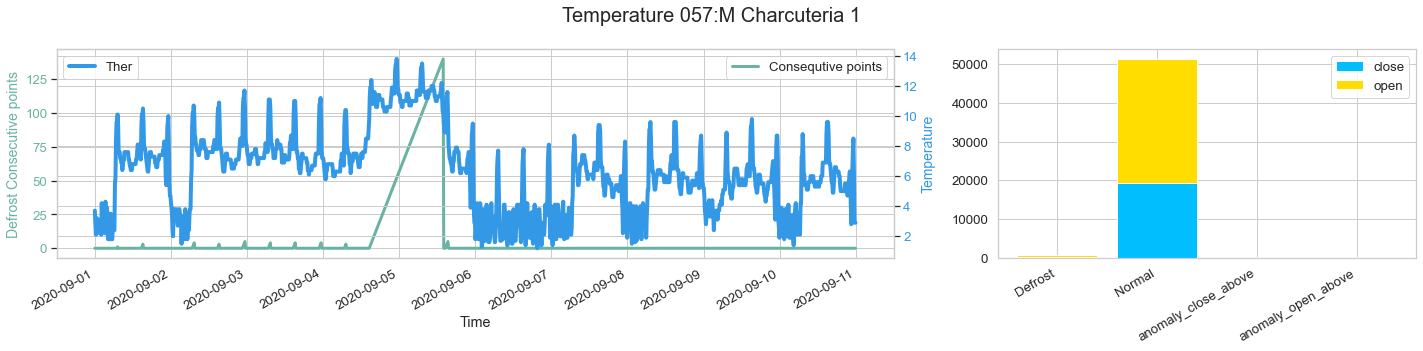

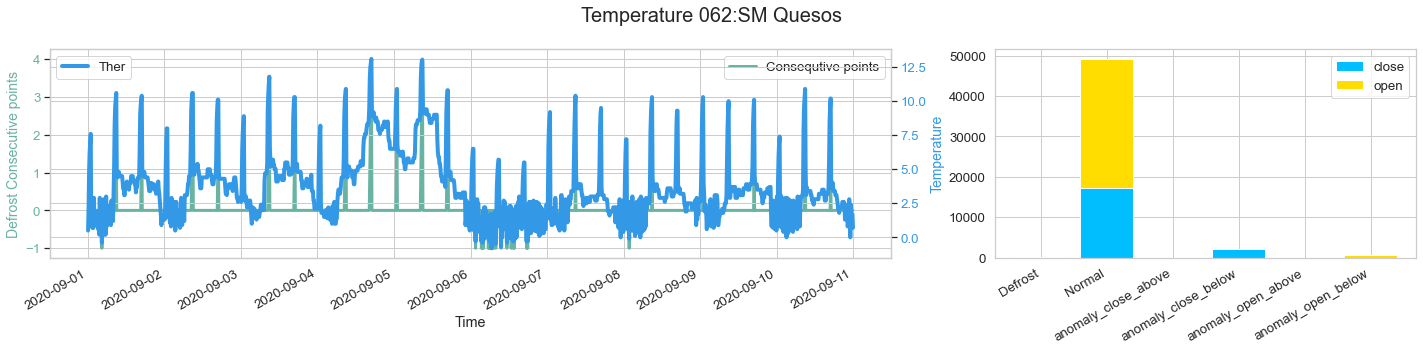

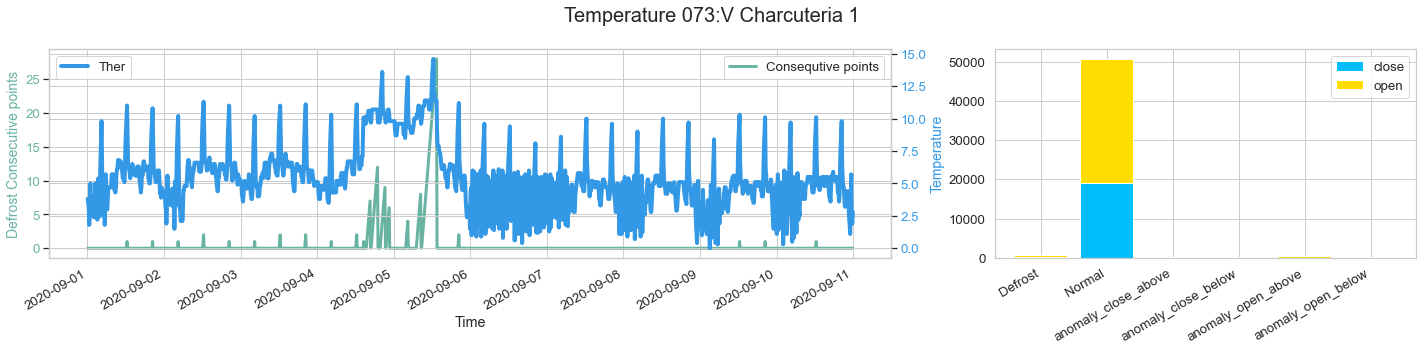

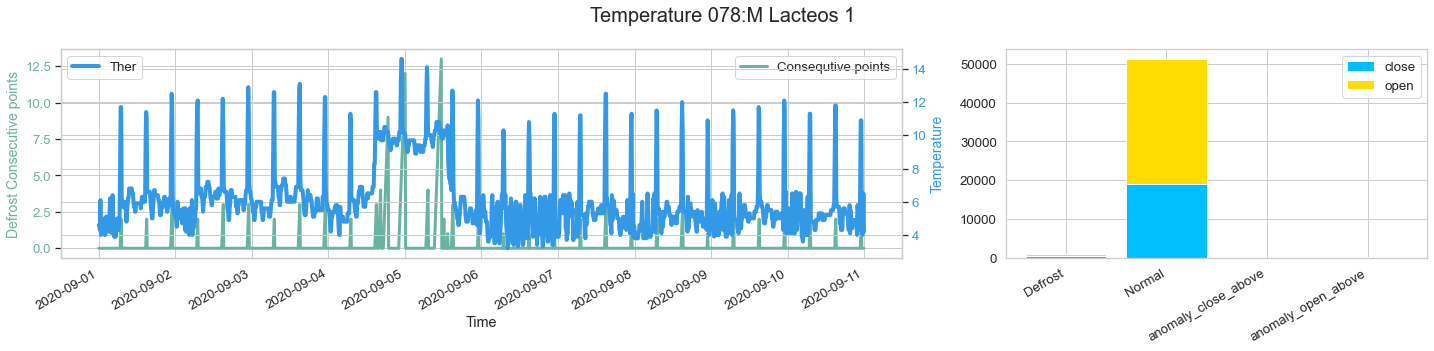

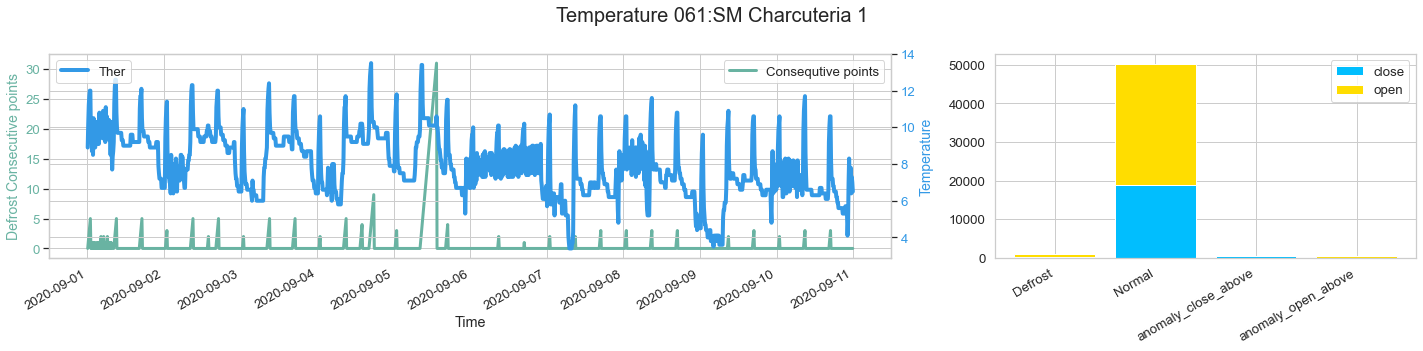

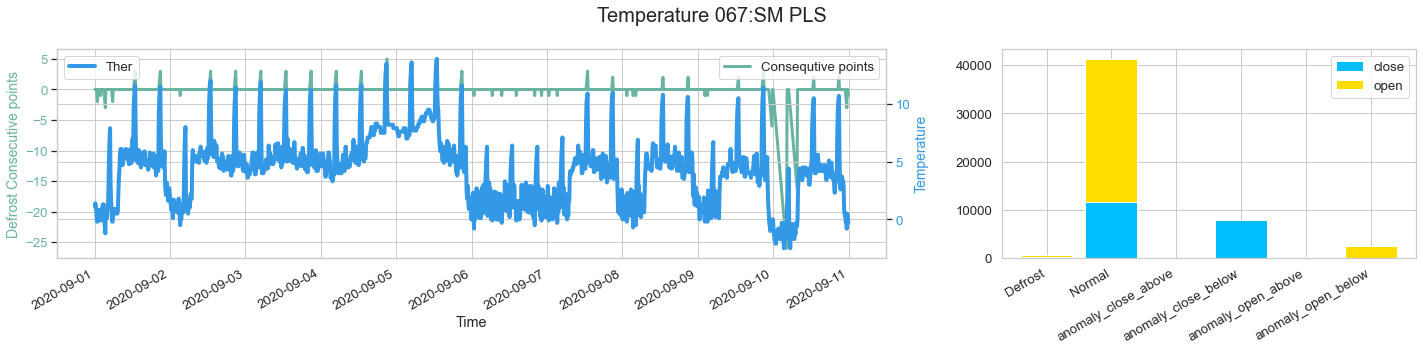

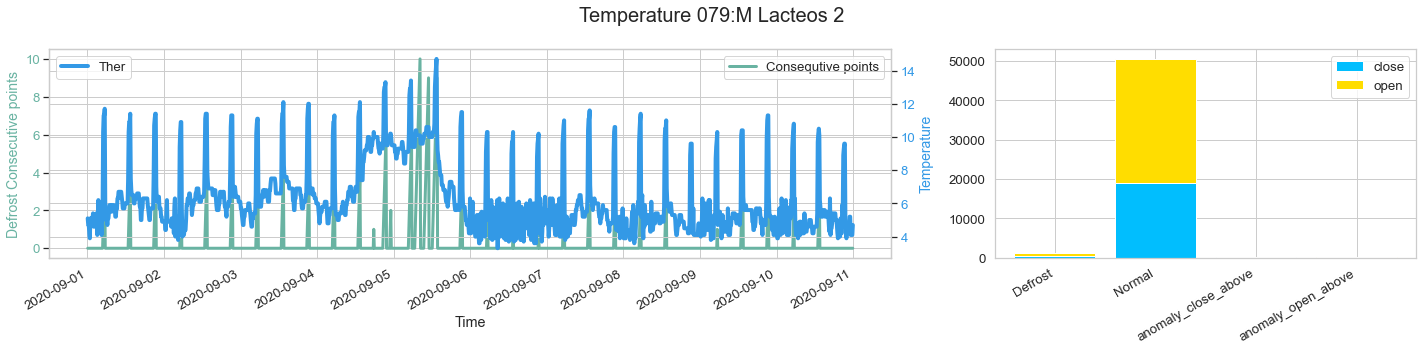

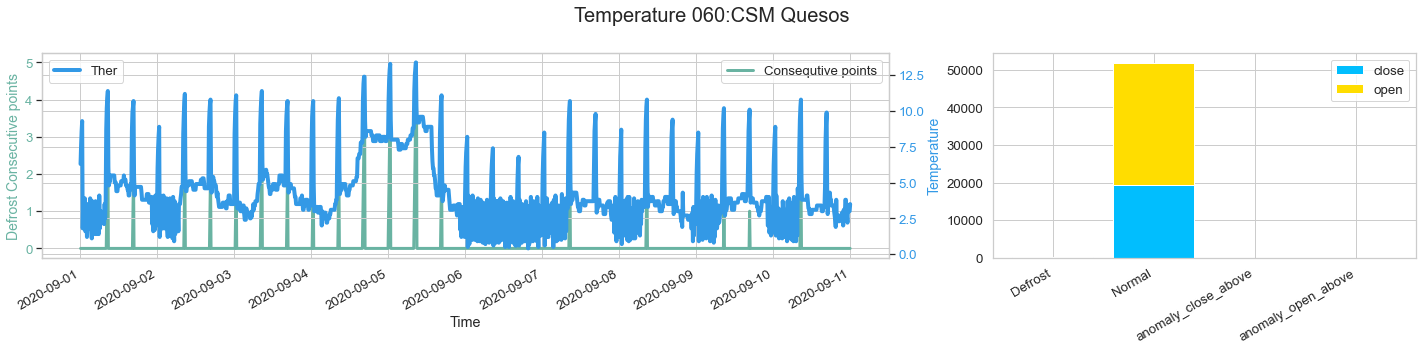

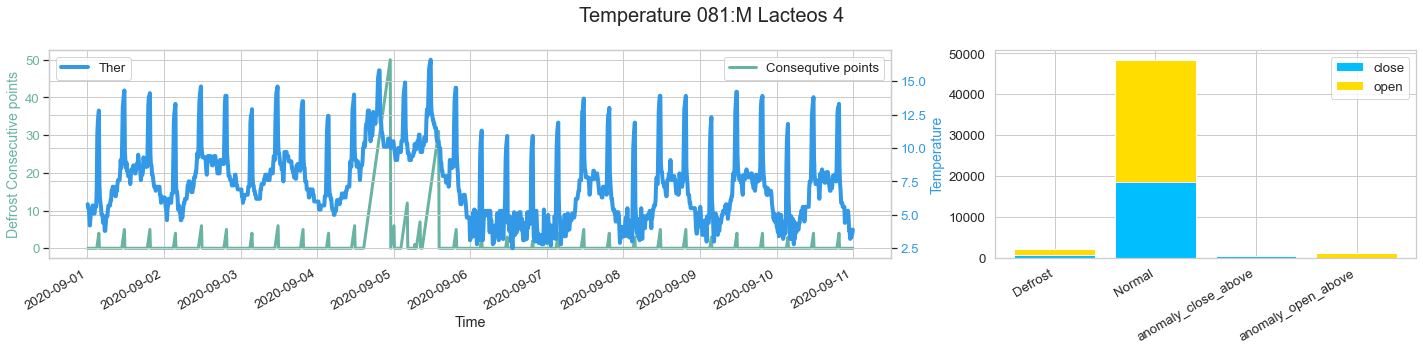

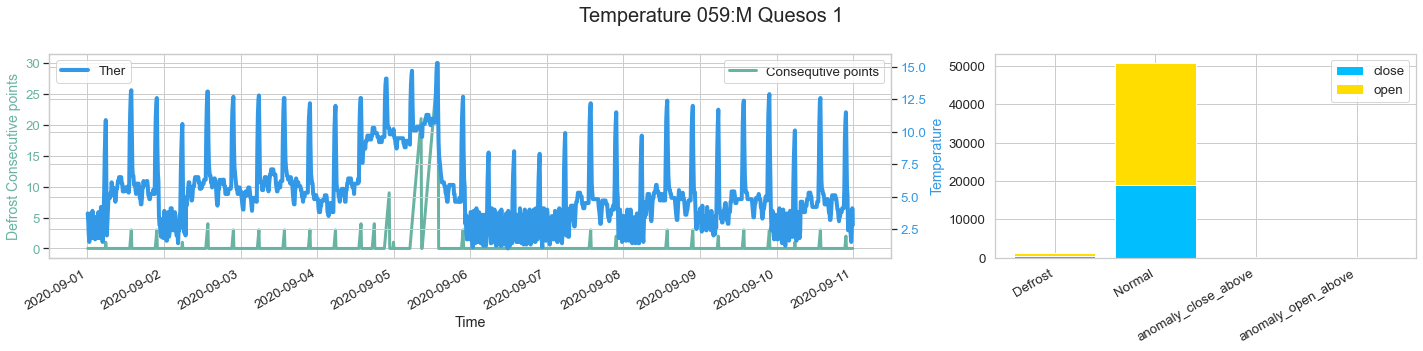

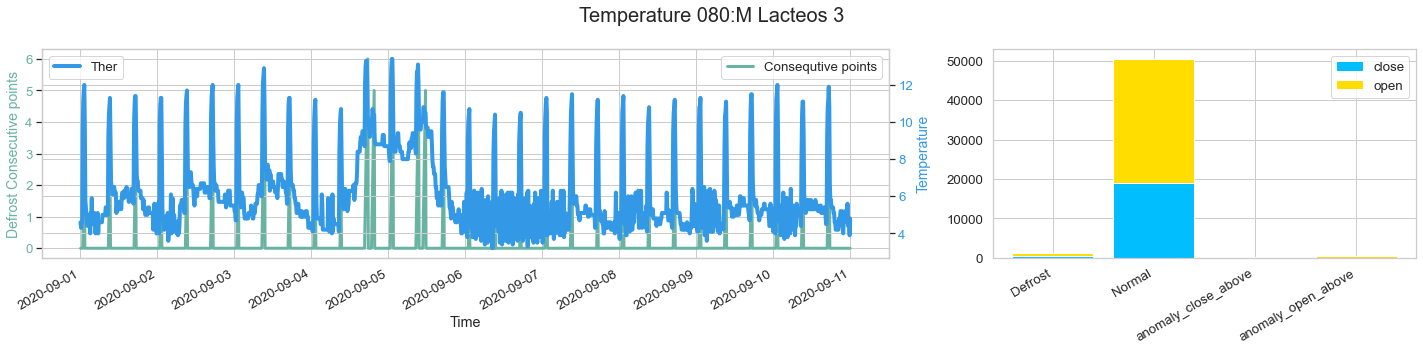

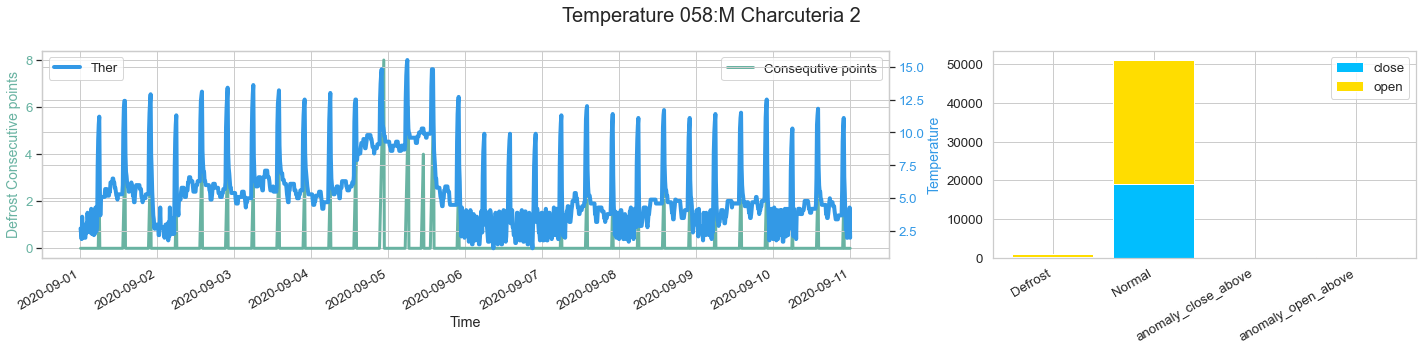

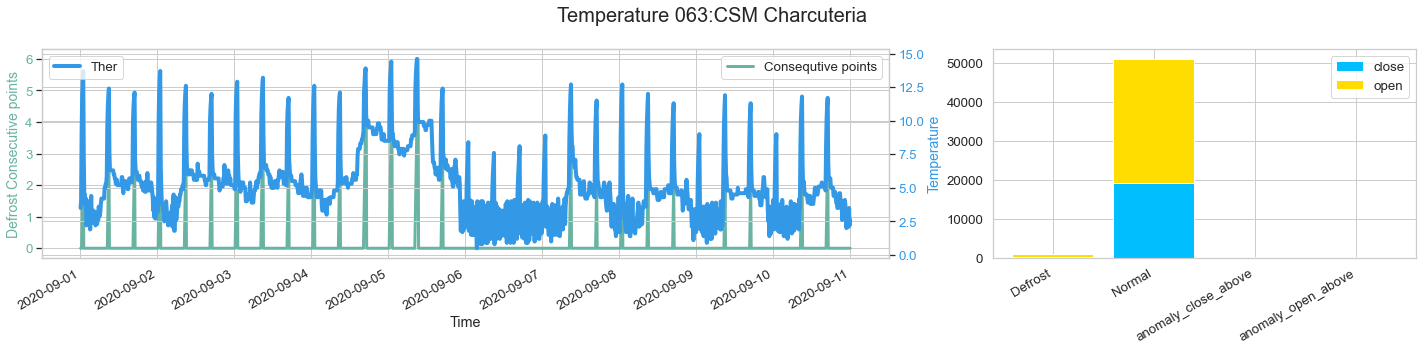

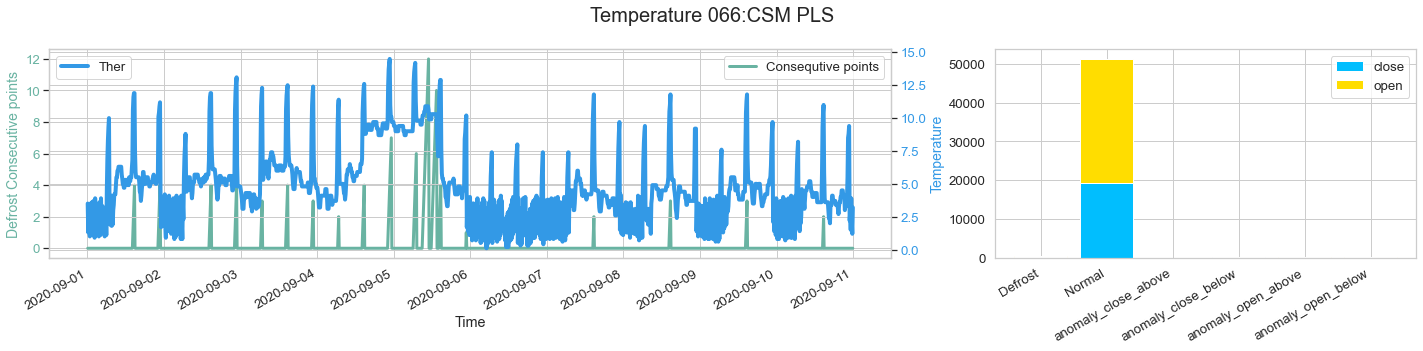

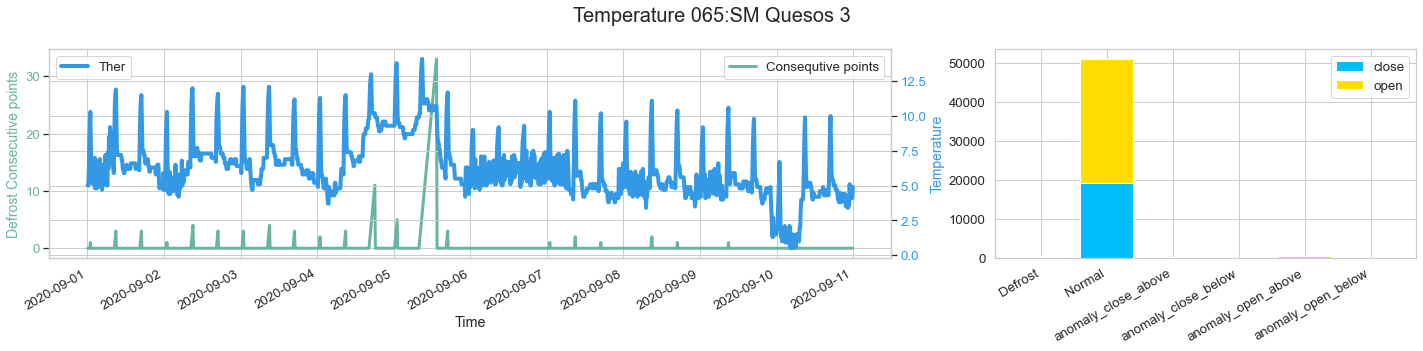

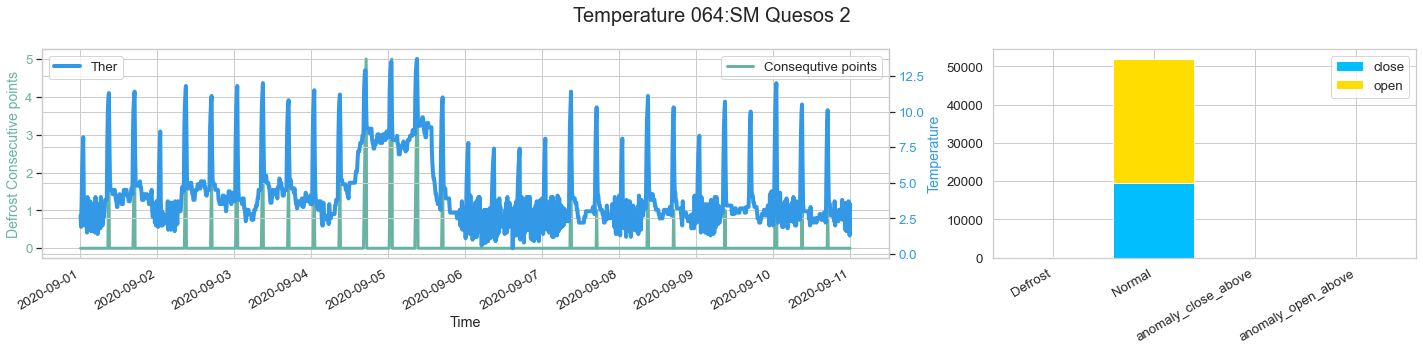

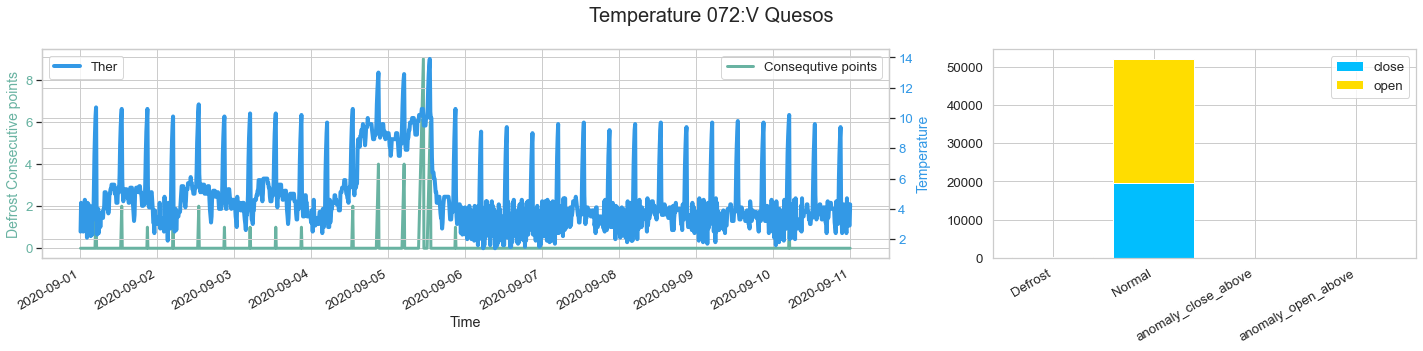

In [26]:
empty = []
for i in assets:
    
    
    df = data_merge[data_merge['AssetName']== i]
    defrost = df[['Timetag','Defrost']]
    point = df[['Timetag','AssetName','DataValue']]
    point = point.pivot_table('DataValue','Timetag','AssetName')
    point = myutils.missing_values.drop_columns(point,0.5)
    point = myutils.missing_values.fill_nans(point)

    test_merge = pd.merge(point,defrost, right_on='Timetag',left_index=True)#.set_index('Timetag')
    test_merge['hour'] = pd.to_datetime(test_merge['Timetag'].astype(str)).dt.hour
    test_merge['open/close'] = test_merge['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1) #for class labels
    test_merge = test_merge.set_index('Timetag')
    test_merge['Consecutive'+ i] = test_merge['Defrost'] * (test_merge['Defrost'].groupby((test_merge['Defrost'] != test_merge['Defrost'].shift()).cumsum()).cumcount() + 1)
    test_merge['Status_'+i] = test_merge['Consecutive'+i].apply(lambda x: 'Defrost' if x>0 and x<=2 else ('Anomaly_Below' if x < 0 else ('Anomaly_Above' if x >2 else 'Normal') ))
   
    #get points that have identified as defrost but they should be anomalies
    defrost_begin = test_merge.loc[test_merge['Consecutive'+i]==1]
    # calculate the difference between the beginning of defrosts
    defrost_begin['diff'] =defrost_begin['hour'].diff().abs()
    # if difference is below 4 hours then it can be considered anomaly
    defrost_begin['Status_'+i].loc[defrost_begin['diff']<4]='Anomaly_Above' 
    #update the database with the new labels
    test_merge.drop('hour',axis=1,inplace=True)
    test_merge.update(defrost_begin)
    
    #add s3 & S4
    test_check = check_freezer[check_freezer['AssetName']==i].sort_values(ascending=True,by='Timetag')

    test_check= test_check[['Timetag','PointName','DataValue']]
    test_check = test_check.groupby(['Timetag','PointName'])['DataValue'].mean().unstack('PointName')
    #print(test_check.head)
    
    #fix this it's wrong for a couple of cases
    if test_check.shape[1] >= 2: #increase number if other parameter than S3 and S4 is added
        test_check['S4S3diff_'+i] = test_check.iloc[:,-1].abs()-test_check.iloc[:,-2].abs()
        test_check['S4S3_State_'+i] = test_check['S4S3diff_'+i].apply(lambda x: 0 if x<5 else 1) #for new class labels
        #print(test_check.head())
        
    


    #full dataset per asset
    check_freezer_merge = pd.merge(test_merge,test_check,right_on='Timetag',left_index=True)
    #print(check_freezer_merge.head())
    check_freezer_merge['Status_'+i]=check_freezer_merge.apply(classes,axis=1) #new class implementation
    check_freezer_merge.drop('Defrost',axis=1,inplace=True)
    check_freezer_merge = myutils.missing_values.drop_columns(check_freezer_merge,0.1)
    check_freezer_merge = myutils.missing_values.fill_nans(check_freezer_merge)
    #print(check_freezer_merge.shape)
    

    # #append dataframes to a final one
    empty.append(check_freezer_merge)
    
    #plot per asset
    COLOR_TEMPERATURE = "#69b3a2"
    COLOR_CONSECUTIVE = "#3399e6"

    fig, ax1 = plt.subplots(nrows=1,ncols=2,gridspec_kw={'width_ratios': [4, 2]},figsize=(20, 5))
    ax2 = ax1[0].twinx()
    #print(len(check_freezer_merge.columns))
    if len(check_freezer_merge.columns)==8:
        ax1[0].plot(check_freezer_merge.index.values[0:10*144],check_freezer_merge.iloc[0:10*144]['Consecutive'+i], color=COLOR_TEMPERATURE, lw=3,label ='Consequtive points')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,0], color=COLOR_CONSECUTIVE, lw=4,label='Ther')
        # ax2.plot(check_freezer_merge.index.values[0:1*144],
        #                 check_freezer_merge.iloc[0:1*144].iloc[:,1], color='Red', lw=4,label='Cut out')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,4], color='Green', lw=4, label='S3')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,5], color='Yellow', lw=4,label='S4')
        
        #measure =check_freezer_merge.iloc[:,2].value_counts()
        measure = check_freezer_merge.groupby(check_freezer_merge.iloc[:,3])['open/close'].value_counts().unstack().fillna(0)
        #axis.title.set_text("Point: {}".format(point))
        ax1[1].bar(measure.index,measure[0],label='close')
        ax1[1].bar(measure.index,measure[1],bottom=measure[0], label ='open')
        ax1[1].legend()
        ax1[1].set_xticklabels(measure.index,rotation=20)

        #ax1[1].bar(measure.keys(),height=measure)
        #ax1[1].set_xticklabels(measure.keys(),rotation=20)
            

    else:
        ax1[0].plot(check_freezer_merge.index.values[0:10*144],check_freezer_merge.iloc[0:10*144]['Consecutive'+i], color=COLOR_TEMPERATURE, lw=3,label='Consequtive points')
        ax2.plot(check_freezer_merge.index.values[0:10*144],
                        check_freezer_merge.iloc[0:10*144].iloc[:,0], color=COLOR_CONSECUTIVE, lw=4,label='Ther')
        # ax2.plot(check_freezer_merge.index.values[0:1*144],
        #                 check_freezer_merge.iloc[0:1*144].iloc[:,3], color='Red', lw=4,label='Cut out')
        # ax2.plot(check_freezer_merge.index.values[0:10*144],
        #                 check_freezer_merge.iloc[0:10*144].iloc[:,4], color='Green', lw=4, label ='S4')
        #measure =check_freezer_merge.iloc[:,2].value_counts()

        measure = check_freezer_merge.groupby(check_freezer_merge.iloc[:,3])['open/close'].value_counts().unstack().fillna(0)
        #axis.title.set_text("Point: {}".format(point))
        ax1[1].bar(measure.index,measure[0],label='close')
        ax1[1].bar(measure.index,measure[1],bottom=measure[0], label ='open')
        ax1[1].legend()
        ax1[1].set_xticklabels(measure.index,rotation=20)
        
            
       
        #ax1[1].bar(measure.keys(),height=measure)
        #ax1[1].set_xticklabels(measure.keys(),rotation=20)
    



    ax1[0].set_xlabel("Time")
    ax1[0].set_ylabel("Defrost Consecutive points", color=COLOR_TEMPERATURE, fontsize=14)
    ax1[0].tick_params(axis="y", labelcolor=COLOR_TEMPERATURE)
    ax1[0].legend(loc='upper right')

    ax2.set_ylabel("Temperature", color=COLOR_CONSECUTIVE, fontsize=14)
    ax2.tick_params(axis="y", labelcolor=COLOR_CONSECUTIVE)
    ax2.legend(loc='upper left')

    fig.suptitle("Temperature "+ i, fontsize=20)

    
    
    fig.autofmt_xdate()
    fig.tight_layout()








In [101]:
final =pd.concat(empty,axis=1)

In [102]:
final.head()

057:M Charcuteria 1  open/close  \
Timetag                                                
2020-09-01 00:05:00                  3.7         0.0   
2020-09-01 00:15:00                  2.8         0.0   
2020-09-01 00:25:00                  2.1         0.0   
2020-09-01 00:35:00                  3.2         0.0   
2020-09-01 00:45:00                  3.2         0.0   

                     Consecutive057:M Charcuteria 1  \
Timetag                                               
2020-09-01 00:05:00                             0.0   
2020-09-01 00:15:00                             0.0   
2020-09-01 00:25:00                             0.0   
2020-09-01 00:35:00                             0.0   
2020-09-01 00:45:00                             0.0   

                    Status_057:M Charcuteria 1  \
Timetag                                          
2020-09-01 00:05:00                     Normal   
2020-09-01 00:15:00                     Normal   
2020-09-01 00:25:00                     Normal   
2020-09-01 00:35:00                     Normal   
2020-09-01 00:45:00                     Normal   

                     057:M Charcuteria 1:  u16 S4 Air Temp  062:SM Quesos  \
Timetag                                                                     
2020-09-01 00:05:00                                    2.2            0.5   
2020-09-01 00:15:00                                    1.3            2.2   
2020-09-01 00:25:00                                    0.6            5.0   
2020-09-01 00:35:00                                    1.5            6.3   
2020-09-01 00:45:00                                    1.5            7.0   

                     open/close  Consecutive062:SM Quesos  \
Timetag                                                     
2020-09-01 00:05:00         0.0                       0.0   
2020-09-01 00:15:00         0.0                       0.0   
2020-09-01 00:25:00         0.0                       0.0   
2020-09-01 00:35:00         0.0                       0.0   
2020-09-01 00:45:00         0.0                       0.0   

                    Status_062:SM Quesos  062:SM Quesos:  u16 S4 Air Temp  \
Timetag                                                                     
2020-09-01 00:05:00               Normal                             -0.4   
2020-09-01 00:15:00               Normal                              1.7   
2020-09-01 00:25:00               Normal                              4.7   
2020-09-01 00:35:00               Normal                              6.1   
2020-09-01 00:45:00               Normal                              6.8   

                     ...  064:SM Quesos 2  open/close  \
Timetag              ...                                
2020-09-01 00:05:00  ...              2.7         0.0   
2020-09-01 00:15:00  ...              1.9         0.0   
2020-09-01 00:25:00  ...              3.7         0.0   
2020-09-01 00:35:00  ...              5.9         0.0   
2020-09-01 00:45:00  ...              7.2         0.0   

                     Consecutive064:SM Quesos 2 Status_064:SM Quesos 2  \
Timetag                                                                  
2020-09-01 00:05:00                         0.0                 Normal   
2020-09-01 00:15:00                         0.0                 Normal   
2020-09-01 00:25:00                         0.0                 Normal   
2020-09-01 00:35:00                         0.0                 Normal   
2020-09-01 00:45:00                         0.0                 Normal   

                     064:SM Quesos 2:  u16 S4 Air Temp  072:V Quesos  \
Timetag                                                                
2020-09-01 00:05:00                                2.2           2.5   
2020-09-01 00:15:00                                0.8           4.4   
2020-09-01 00:25:00                                3.2           2.7   
2020-09-01 00:35:00                                5.8           2.7   
2020-09-01 00:45:00             

# Defrost Report

In [52]:
#get the defrost details
defrost_report = (final.loc[:,final.columns.str.contains('Consecutive')].reset_index().set_index(["Timetag"])
         .stack()
         .reset_index(name='Consecutive')
         .rename(columns={'level_2':'AssetName'}))

In [53]:
defrost_report = myutils.time_expand.time(defrost_report,'Timetag')

In [54]:
defrost_report_above = defrost_report[defrost_report['Consecutive']>2]
defrost_report_below = defrost_report[defrost_report['Consecutive']<0]
defrost_report_defrost = defrost_report[(defrost_report['Consecutive']>0) & (defrost_report['Consecutive']<=2)]
defrost_report_normal = defrost_report[defrost_report['Consecutive']==0]

In [55]:
report_below=defrost_report_below.groupby(['Date','level_1'])['Consecutive'].agg(max_below= 'max',total_below = 'sum',mean_below='mean').sort_values(ascending=False,by=['Date','total_below'])
report_above=defrost_report_above.groupby(['Date','level_1'])['Consecutive'].agg(max_above= 'max',total_above = 'sum',mean_above='mean').sort_values(ascending=False,by=['Date','total_above'])
report_defrost = defrost_report_defrost.groupby(['Date','level_1'])['Consecutive'].agg(max_defrost= 'max',total_defrost = 'sum',mean_defrost='mean').sort_values(ascending=False,by=['Date','total_defrost'])#.iloc[60:90]


In [56]:
final_report = pd.concat([report_below,report_above,report_defrost],axis=1)
final_report

max_below  total_below  mean_below  \
Date       level_1                                                              
2020-09-01 Consecutive057:M Charcuteria 1        NaN          NaN         NaN   
           Consecutive057:M Charcuteria 1        NaN          NaN         NaN   
           Consecutive058:M Charcuteria 2        NaN          NaN         NaN   
           Consecutive058:M Charcuteria 2        NaN          NaN         NaN   
           Consecutive059:M Quesos 1             NaN          NaN         NaN   
...                                              ...          ...         ...   
2021-08-30 Consecutive079:M Lacteos 2            NaN          NaN         NaN   
           Consecutive080:M Lacteos 3            NaN          NaN         NaN   
           Consecutive080:M Lacteos 3            NaN          NaN         NaN   
           Consecutive081:M Lacteos 4            NaN          NaN         NaN   
           Consecutive081:M Lacteos 4            NaN          NaN         NaN   

                                           max_above  total_above  mean_above  \
Date       level_1                                                              
2020-09-01 Consecutive057:M Charcuteria 1        3.0          3.0        3.00   
           Consecutive057:M Charcuteria 1        3.0          3.0        3.00   
           Consecutive058:M Charcuteria 2        4.0         14.0        3.50   
           Consecutive058:M Charcuteria 2        4.0         14.0        3.50   
           Consecutive059:M Quesos 1             3.0          6.0        3.00   
...                                              ...          ...         ...   
2021-08-30 Consecutive079:M Lacteos 2            4.0          7.0        3.50   
           Consecutive080:M Lacteos 3            3.0          9.0        3.00   
           Consecutive080:M Lacteos 3            3.0          9.0        3.00   
           Consecutive081:M Lacteos 4            4.0         13.0        3.25   
           Consecutive081:M Lacteos 4            4.0         13.0        3.25   

                                           max_defrost  total_defrost  \
Date       level_1                                                      
2020-09-01 Consecutive057:M Charcuteria 1          2.0            4.0   
           Consecutive057:M Charcuteria 1          2.0            4.0   
           Consecutive058:M Charcuteria 2          2.0            9.0   
           Consecutive058:M Charcuteria 2          2.0            9.0   
           Consecutive059:M Quesos 1               2.0            7.0   
...                                                ...            ...   
2021-08-30 Consecutive079:M Lacteos 2              2.0            9.0   
           Consecutive080:M Lacteos 3              2.0            9.0   
           Consecutive080:M Lacteos 3              2.0            9.0   
           Consecutive081:M Lacteos 4              2.0            9.0   
           Consecutive081:M Lacteos 4              2.0            9.0   

                                           mean_defrost  
Date       level_1                                       
2020-09-01 Consecutive057:M Charcuteria 1      1.333333  
           Consecutive057:M Charcuteria 1      1.333333  
           Consecutive058:M Charcuteria 2      1.500000  
           Consecutive058:M Charcuteria 2      1.500000  
           Consecutive059:M Quesos 1           1.400000  
...                                                 ...  
2021-08-30 Consecutive079:M Lacteos 2          1.500000  
           Consecutive080:M Lacteos 3          1.500000  
           Consecutive080:M Lacteos 3          1.500000  
           Consecutive081:M Lacteos 4          1.500000  
           Consecutive081:M Lacteos 4          1.500000  

[5566 rows x 9 columns]

In [57]:
final_report.reset_index().sort_values(ascending=False,by='mean_above').drop_duplicates()

Date                          level_1  max_below  total_below  \
130  2020-09-05   Consecutive057:M Charcuteria 1        NaN          NaN   
96   2020-09-04   Consecutive057:M Charcuteria 1        NaN          NaN   
1160 2020-11-09  Consecutive061:SM Charcuteria 1        NaN          NaN   
783  2020-10-10       Consecutive065:SM Quesos 3        NaN          NaN   
128  2020-09-04       Consecutive081:M Lacteos 4        NaN          NaN   
...         ...                              ...        ...          ...   
5551 2021-08-30   Consecutive063:CSM Charcuteria        NaN          NaN   
5552 2021-08-30       Consecutive065:SM Quesos 3        NaN          NaN   
5553 2021-08-30           Consecutive066:CSM PLS       -1.0         -1.0   
5555 2021-08-30            Consecutive067:SM PLS       -1.0        -25.0   
5559 2021-08-30       Consecutive078:M Lacteos 1        NaN          NaN   

      mean_below  max_above  total_above  mean_above  max_defrost  \
130          NaN      140.0       8286.0   95.241379          2.0   
96           NaN       56.0       1596.0   29.018182          2.0   
1160         NaN       47.0       1099.0   26.804878          2.0   
783          NaN       48.0       1165.0   25.888889          2.0   
128          NaN       50.0       1309.0   22.964912          2.0   
...          ...        ...          ...         ...          ...   
5551         NaN        NaN          NaN         NaN          1.0   
5552         NaN        NaN          NaN         NaN          1.0   
5553   -1.000000        NaN          NaN         NaN          2.0   
5555   -1.041667        NaN          NaN         NaN          2.0   
5559         NaN        NaN          NaN         NaN          1.0   

      total_defrost  mean_defrost  
130             3.0      1.500000  
96              6.0      1.500000  
1160            3.0      1.500000  
783             6.0      1.500000  
128            12.0      1.500000  
...             ...           ...  
5551            1.0      1.000000  
5552            1.0      1.000000  
5553            4.0      1.333333  
5555            3.0      1.500000  
5559            3.0      1.000000  

[4077 rows x 11 columns]

In [ ]:
final_report.to_csv('Data\Processed\Defrost_report.csv')

# Differential report

In [28]:
differential_report = (final.loc[:,final.columns.str.contains('S4S3diff')].reset_index().set_index(["Timetag"])
         .stack()
         .reset_index(name='S3S4')
         .rename(columns={'level_2':'AssetName'}))

In [29]:
if len(differential_report)==0:
    print( 'No differential report can be made')
else:
    print('Continue to report')

No differential report can be made


In [ ]:
# differential_report = myutils.time_expand.time(differential_report,'Timetag')

In [ ]:
# differential_report.groupby(['Date','level_1'])['S3S4'].agg(max_diff= 'max',min_diff='min',mean_diff='mean').sort_values(ascending=False,by=['Date','max_diff'])

In [80]:
final.drop(['open/close'],axis=1,inplace=True)

In [ ]:
#final.to_csv('final_test.csv')

In [103]:
final.shape

(52117, 85)

In [104]:
status = [i for i in final.columns if i.startswith('Status')]

# Alarms exploration

In [65]:
#alarms = pd.read_csv('Data\Processed\\freezer_alarms.csv')

alarms = Alarms.alarms(1229,'milk_charcuterie','Data\Processed\89247_milk_charcuterie_Final.csv','Data\Processed\\89247_temp_groups.csv','Data\Processed\89247_milk_charcuterie_assets.csv',type='--- High Temp.')

Assets before ['057:M Charcuteria 1', '062:SM Quesos', '073:V Charcuteria 1', '078:M Lacteos 1', '061:SM Charcuteria 1', '067:SM PLS', '079:M Lacteos 2', '060:CSM Quesos', '081:M Lacteos 4', '059:M Quesos 1', '080:M Lacteos 3', '058:M Charcuteria 2', '063:CSM Charcuteria', '066:CSM PLS', '065:SM Quesos 3', '064:SM Quesos 2', '072:V Quesos']
Difference of first and second String: set()
First and Second list are Equal
Assets after ['057:M Charcuteria 1', '062:SM Quesos', '073:V Charcuteria 1', '078:M Lacteos 1', '061:SM Charcuteria 1', '067:SM PLS', '079:M Lacteos 2', '060:CSM Quesos', '081:M Lacteos 4', '059:M Quesos 1', '080:M Lacteos 3', '058:M Charcuteria 2', '063:CSM Charcuteria', '066:CSM PLS', '065:SM Quesos 3', '064:SM Quesos 2', '072:V Quesos']


In [ ]:
alarms= alarms[(alarms['reportedtime']>='2020-09-01')&(alarms['ReasonText']=='--- High Temp.')]

In [ ]:
#alarms.drop('Unnamed: 0',axis=1,inplace=True)

In [31]:
test_assets = set(assets).difference(set(alarms.columns[2:]))

print("Difference of first and second String: " + str(test_assets))
if not test_assets:
    print("First and Second list are Equal")
# if lists are not equal    
else:
    print("First and Second list are Not Equal")
    assets = [x for x in alarms.columns[2:] if x in assets]
    status = [j for i in assets for j in status if i in j]
    



Difference of first and second String: {'023:I CONG Pescaderia', '019:CB CONG Pescado'}
First and Second list are Not Equal


In [32]:
empty_alarms=[]
for i in assets:
    
    dummie_alarms = alarms[[ 'ReasonText','reportedtime', i]]
    dummie_alarms['reportedtime'] =pd.to_datetime(dummie_alarms['reportedtime'])
    
    dummie_final = final[i].reset_index()
    test = pd.merge_asof(dummie_alarms,dummie_final,right_on='Timetag',left_on='reportedtime',allow_exact_matches=True,direction='nearest')
    test = test.loc[test[i+'_x']>=1]
    test_alarms = test[['Timetag',i+'_y']].set_index('Timetag')
    #test_alarms = test[['ReasonText','Timetag',i+'_y']].set_index('Timetag')

    empty_alarms.append(test_alarms)
   


In [70]:
import joblib
empty_alarms= joblib.load('Data\Processed\\1229_milk_charcuterie_empty_alarms.pkl')

In [ ]:
import joblib
#joblib.dump(empty_alarms,'empty_alarms.pkl')
    

['empty_alarms.pkl']

In [33]:
assert len(empty_alarms[0])>0,'Empty dataframe'

# Further exploration on time and frequency

In [83]:
explore = final.reset_index()

In [84]:
#create additional column with 0 when store is closed and 1 when is open
explore['open/close'] = explore['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1)

In [ ]:
#explore.to_csv('Data\Processed\Explore.csv')

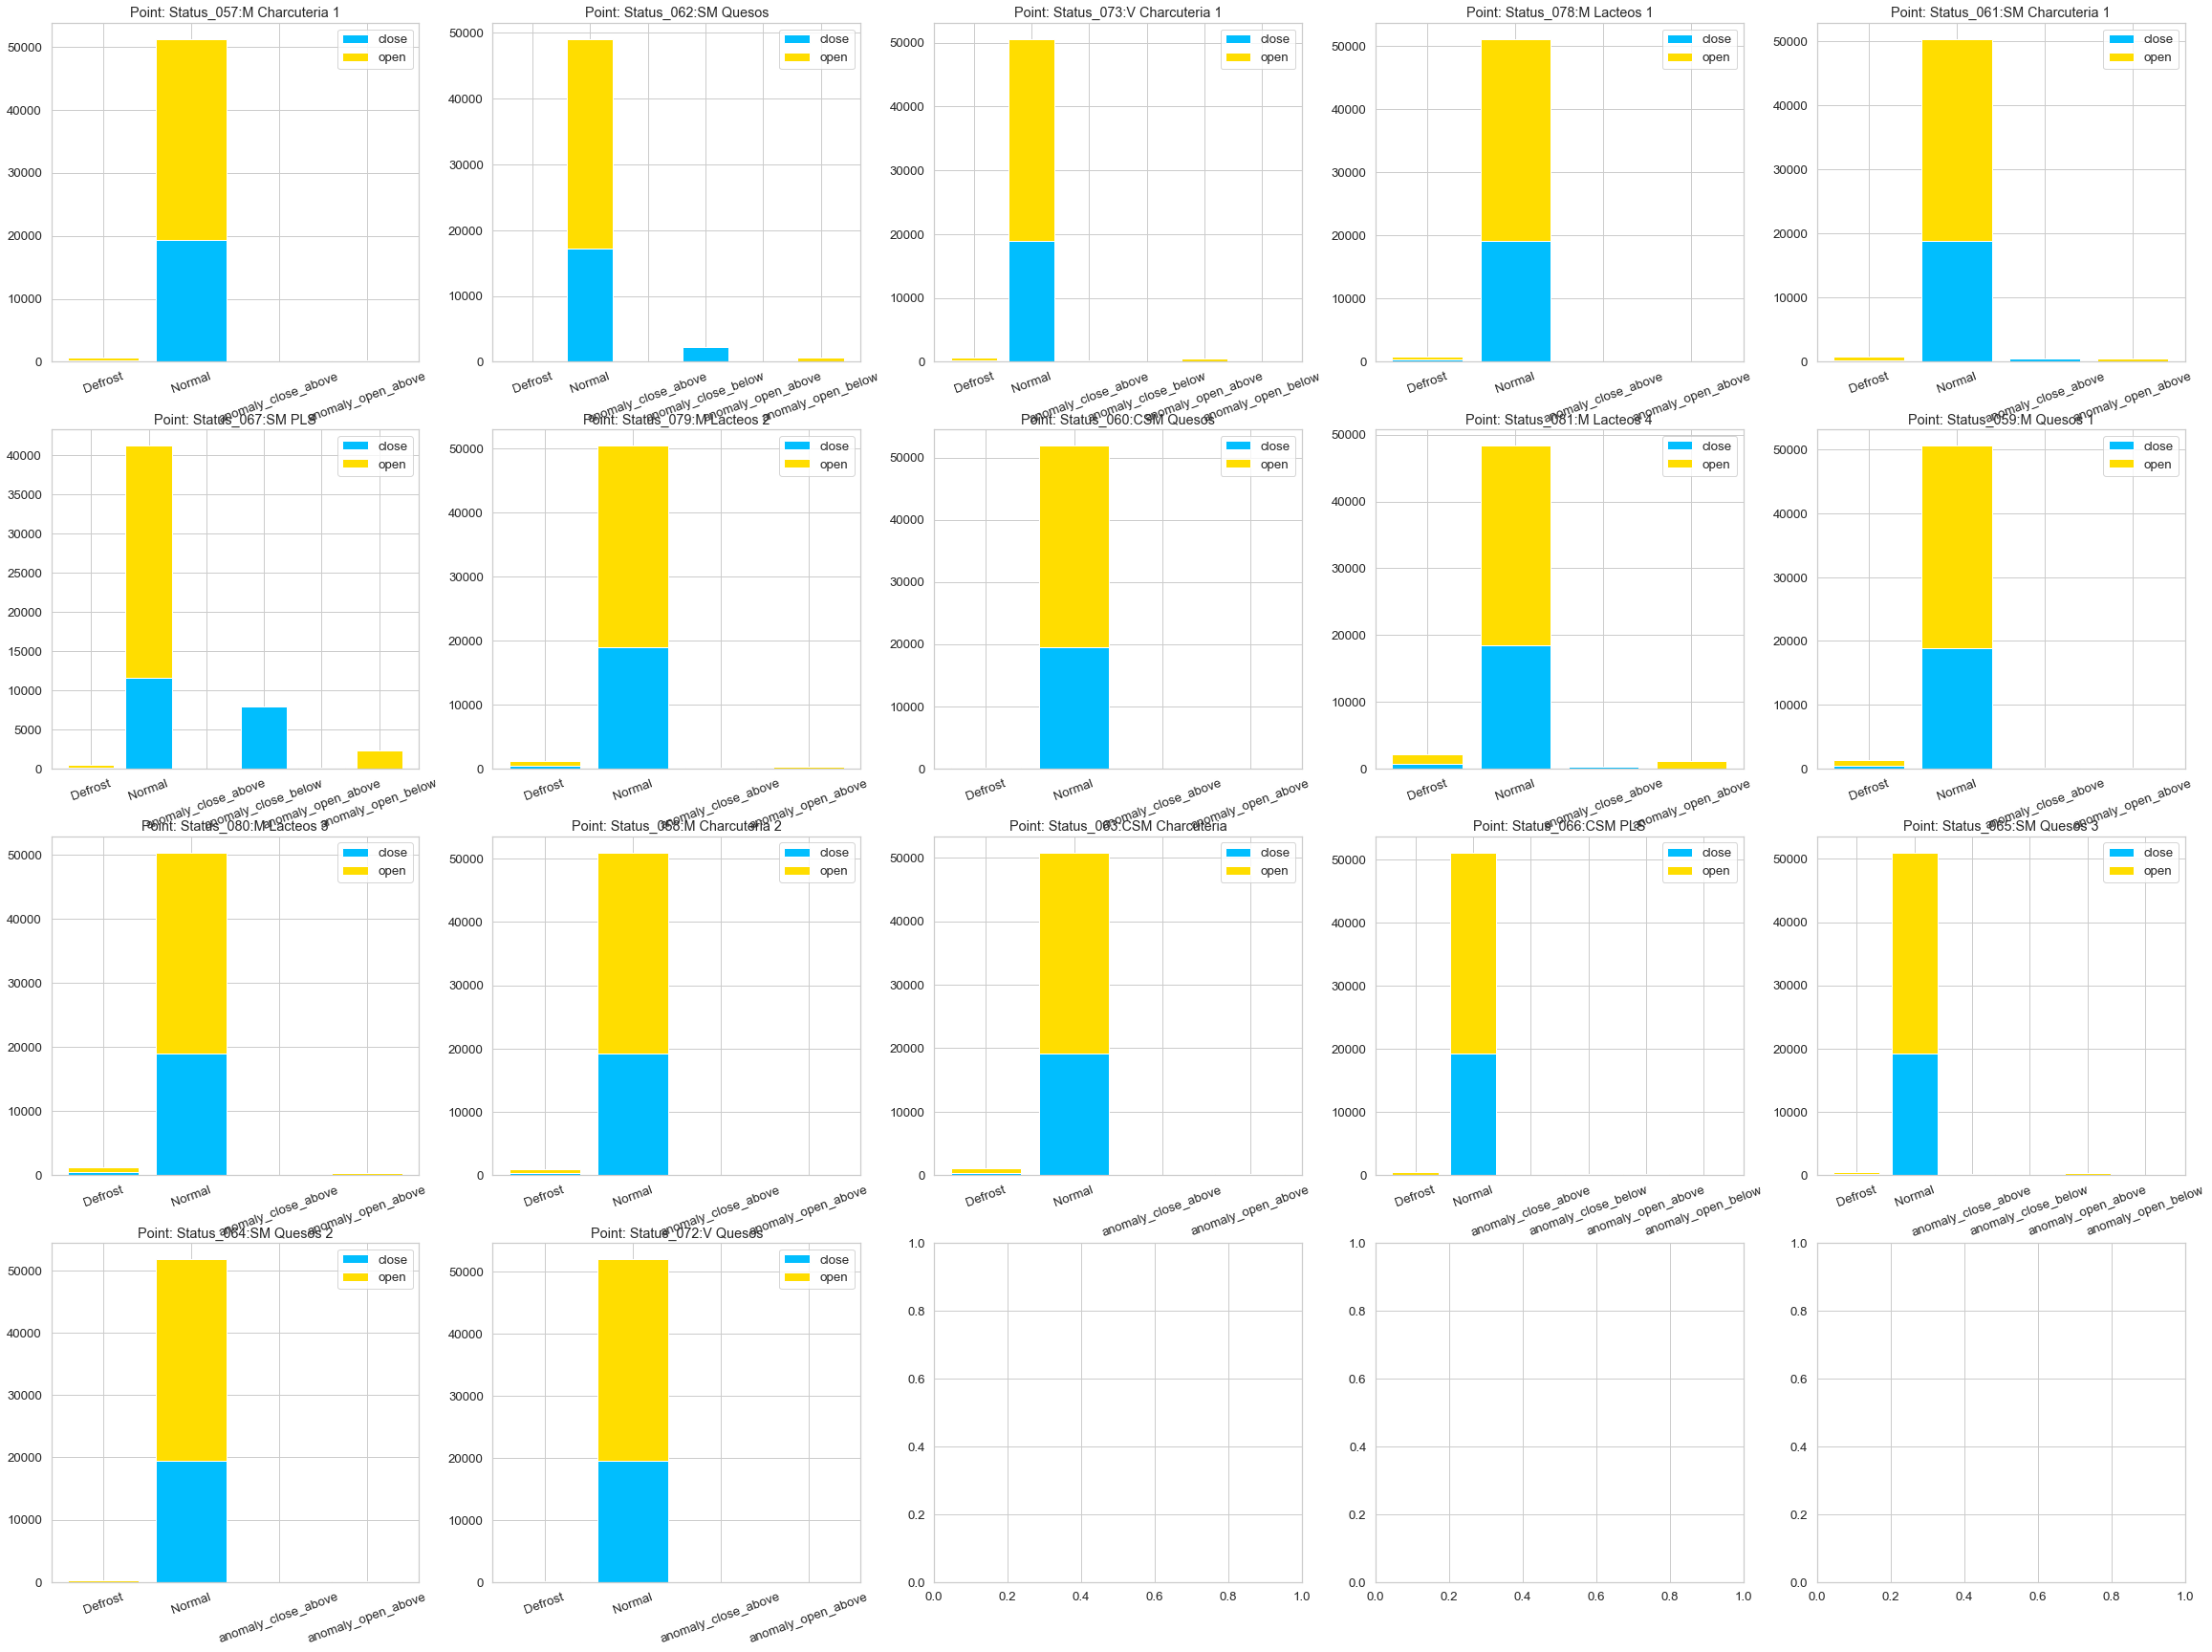

In [85]:
ncols = 5
nrows = int(len(status)/ncols)+1

f,ax = plt.subplots(nrows,ncols,sharex=False)
f.set_figheight(30)
f.set_figwidth(40)
        

for i , point in enumerate(status):
    axis = ax[i//ncols,i%ncols]
    
    measure = explore.groupby(explore[point])['open/close'].value_counts().unstack().fillna(0)
            
    
    axis.title.set_text("Point: {}".format(point))
    axis.bar(measure.index,measure[0],label='close')
    axis.bar(measure.index,measure[1],bottom=measure[0], label ='open')
    axis.legend()
    axis.set_xticklabels(measure.index,rotation=20)

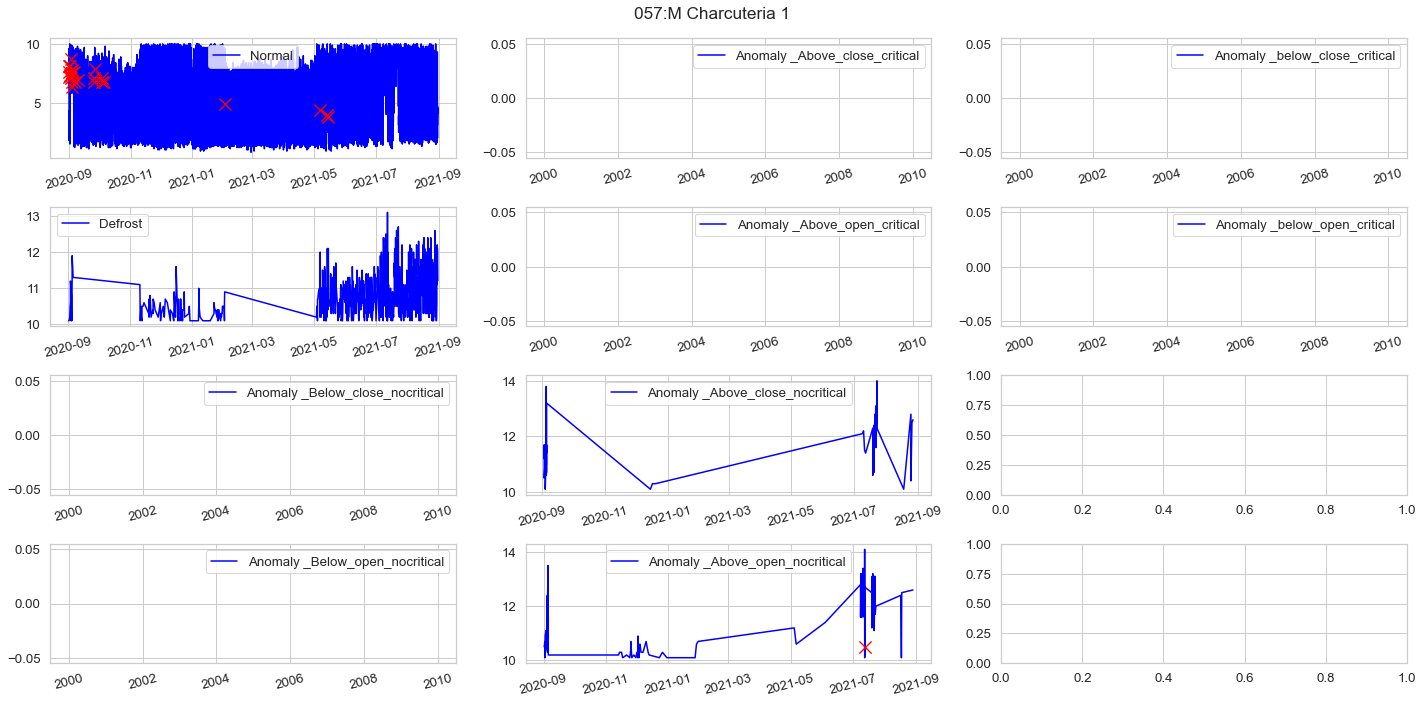

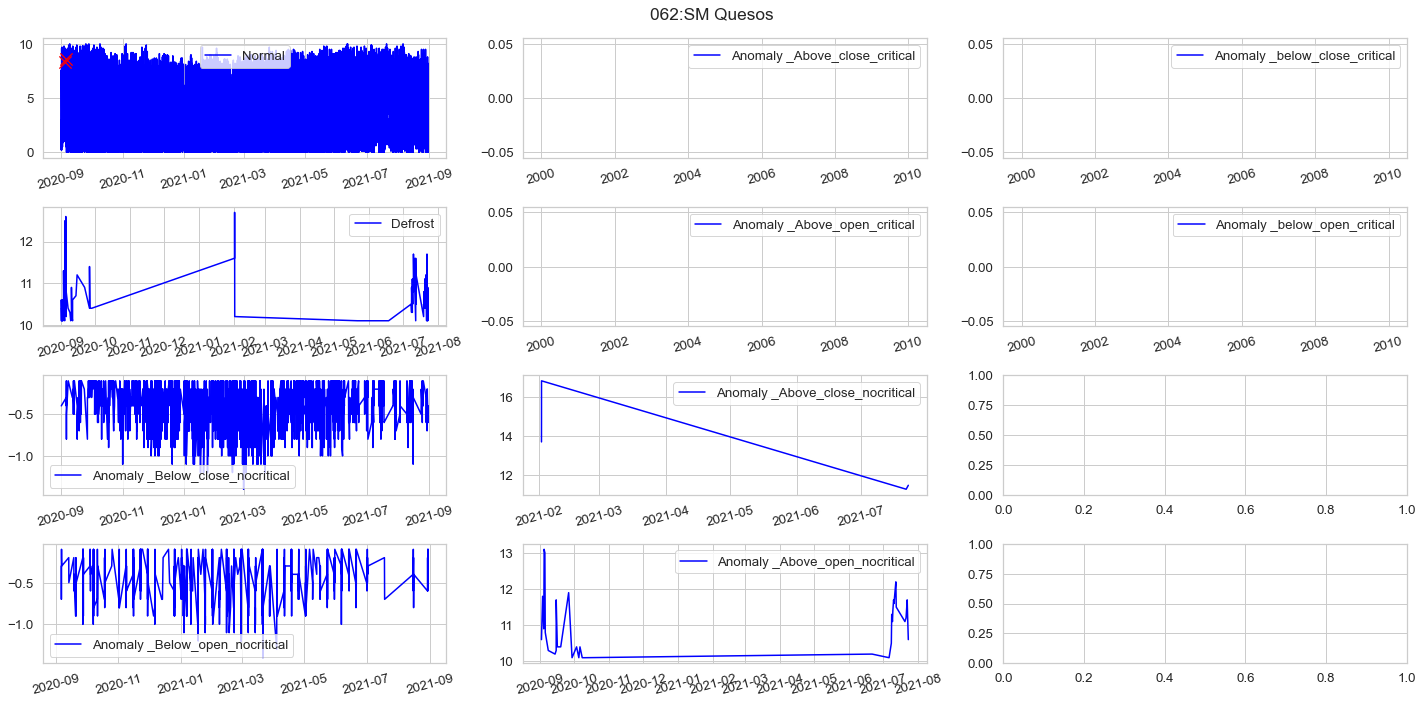

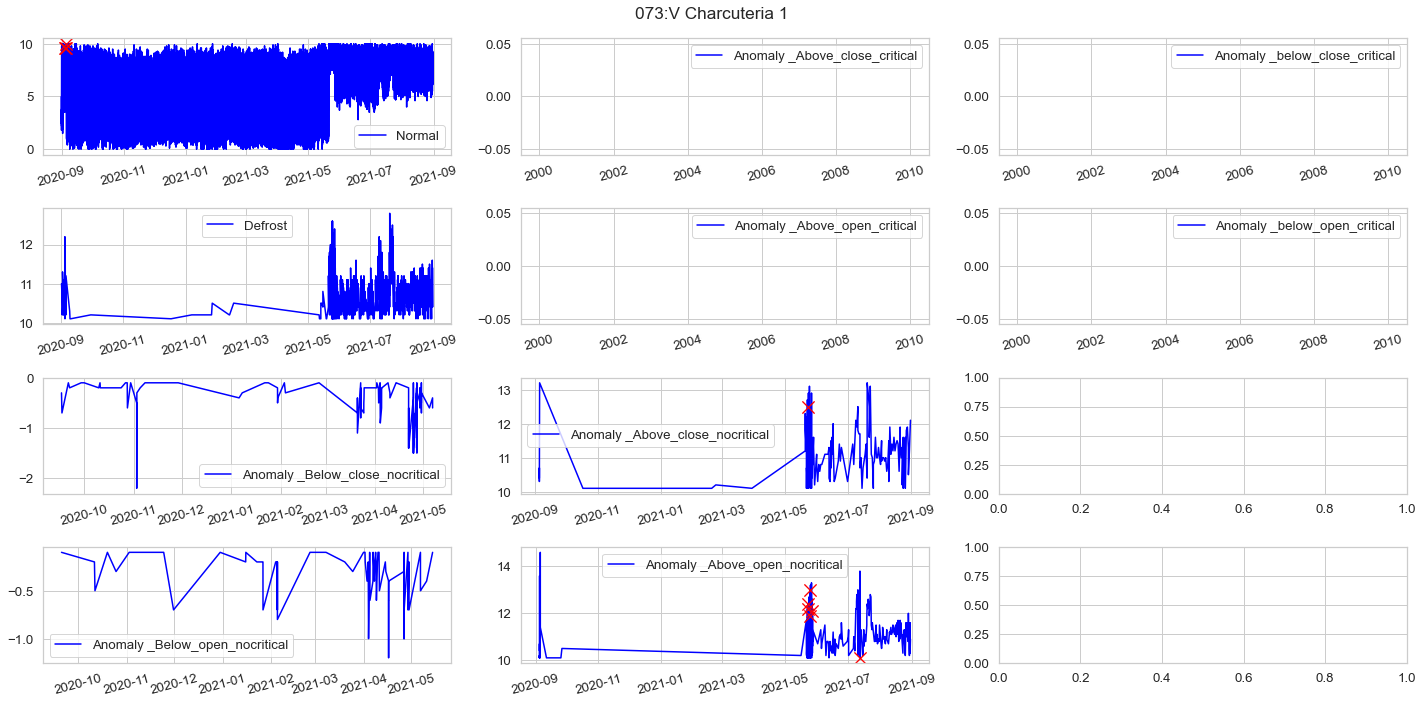

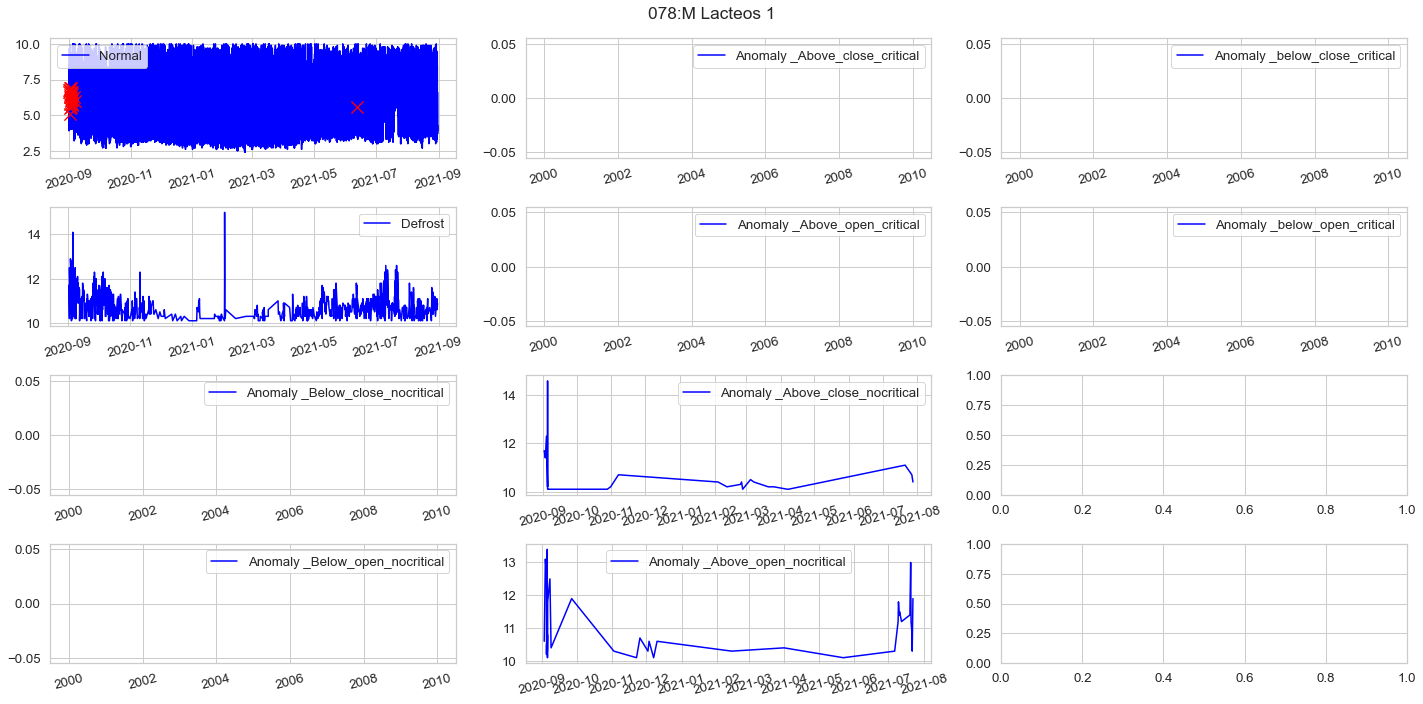

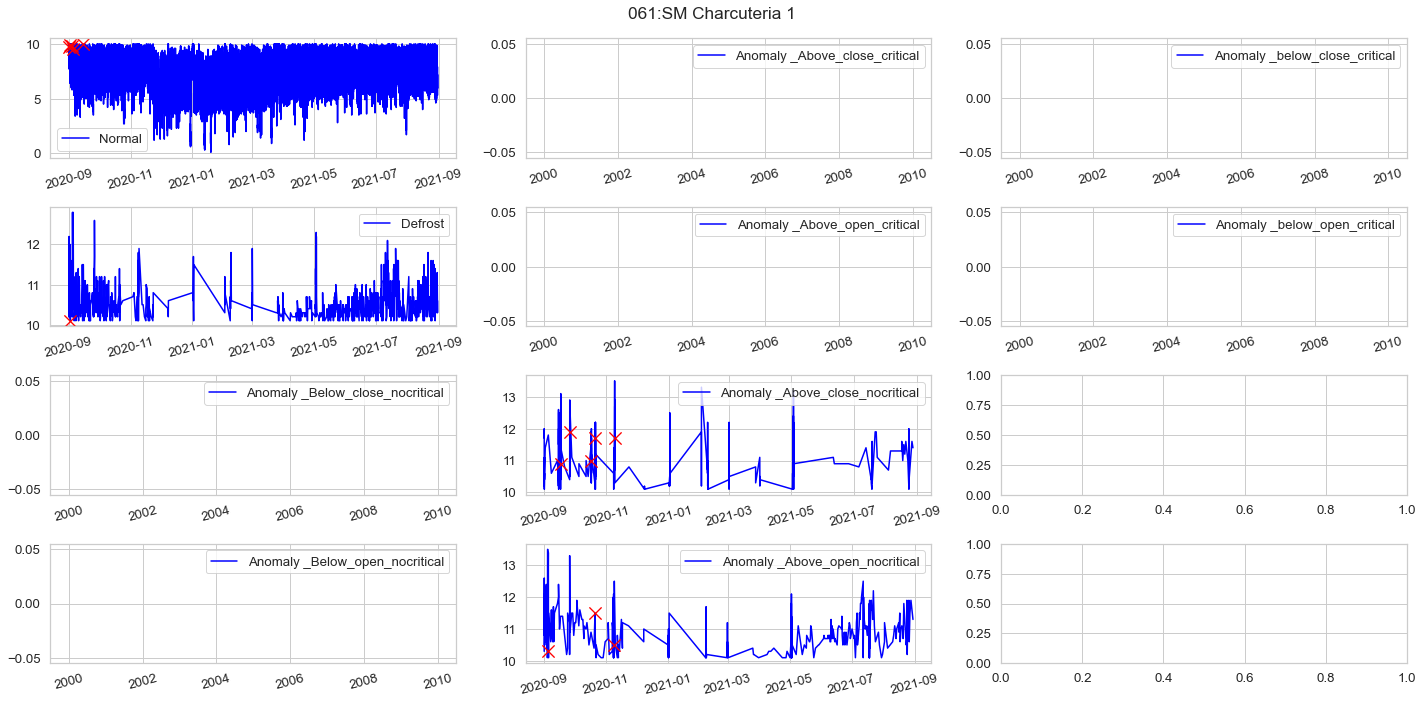

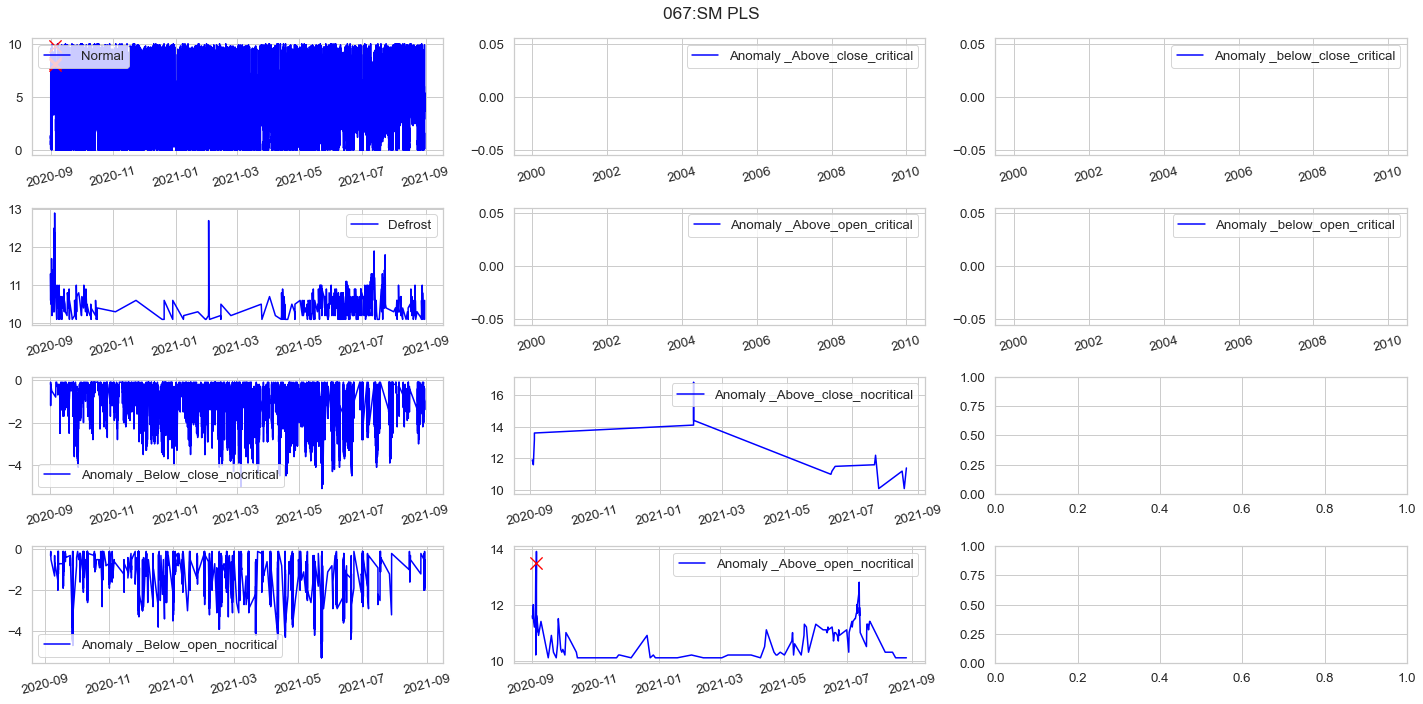

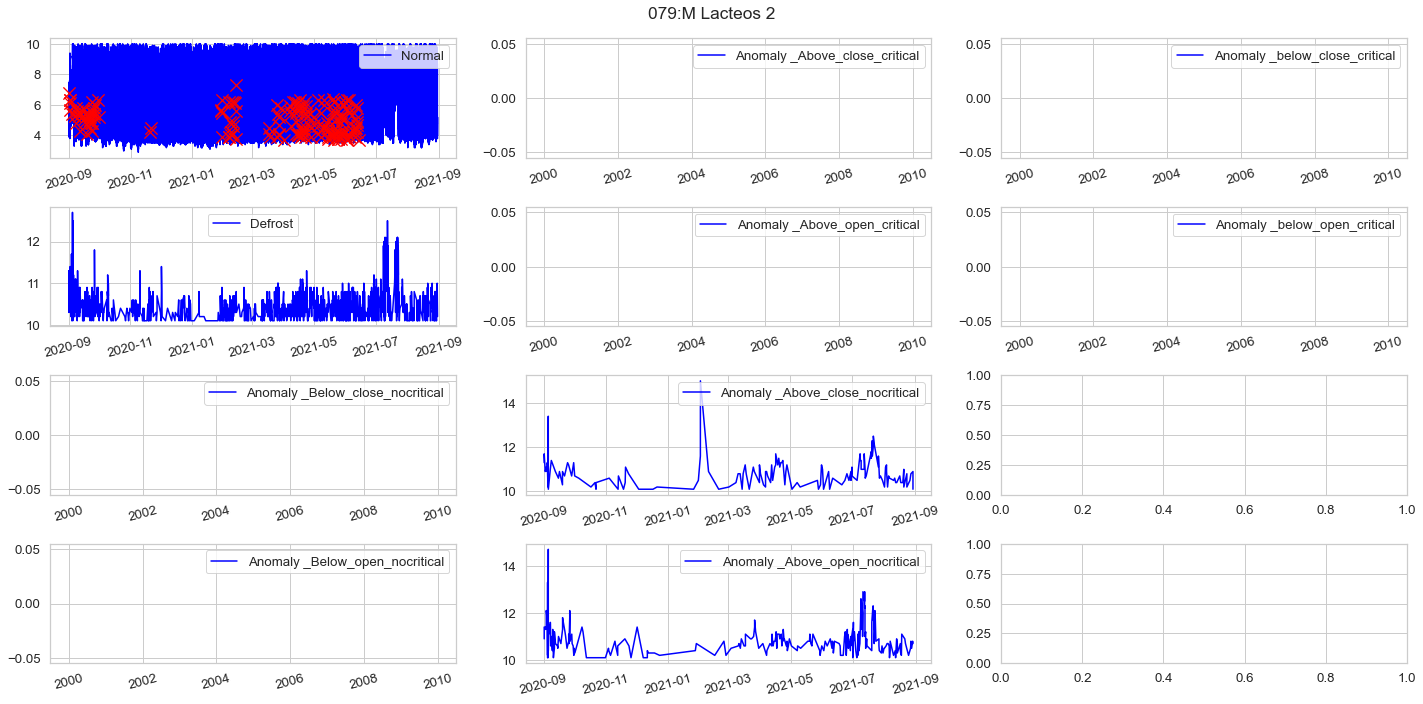

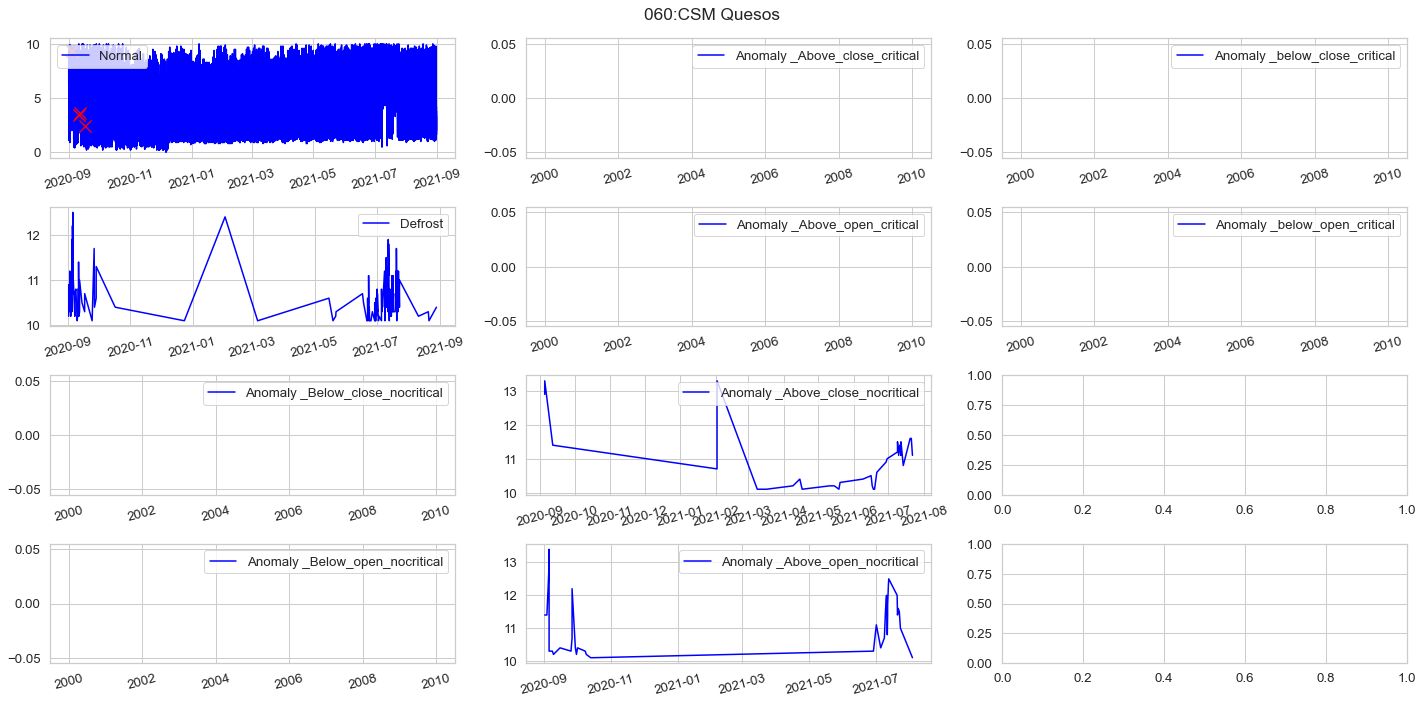

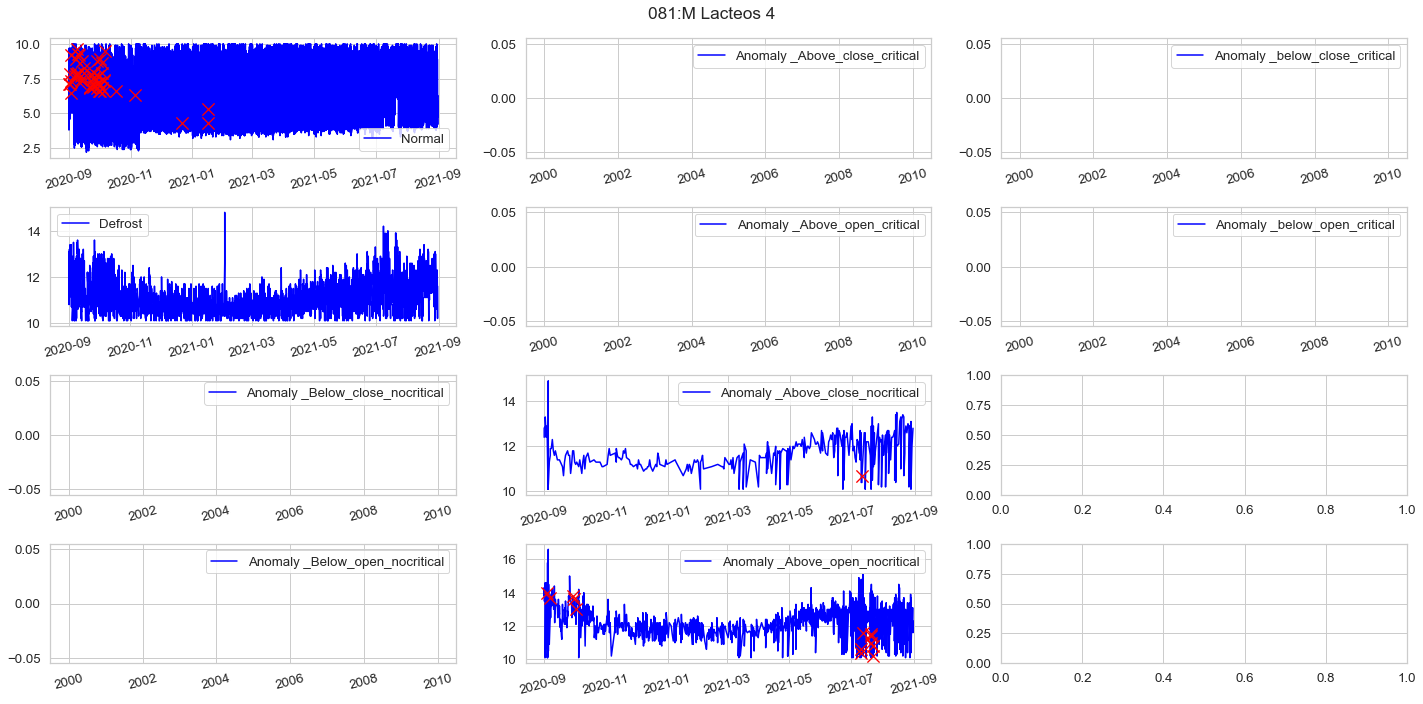

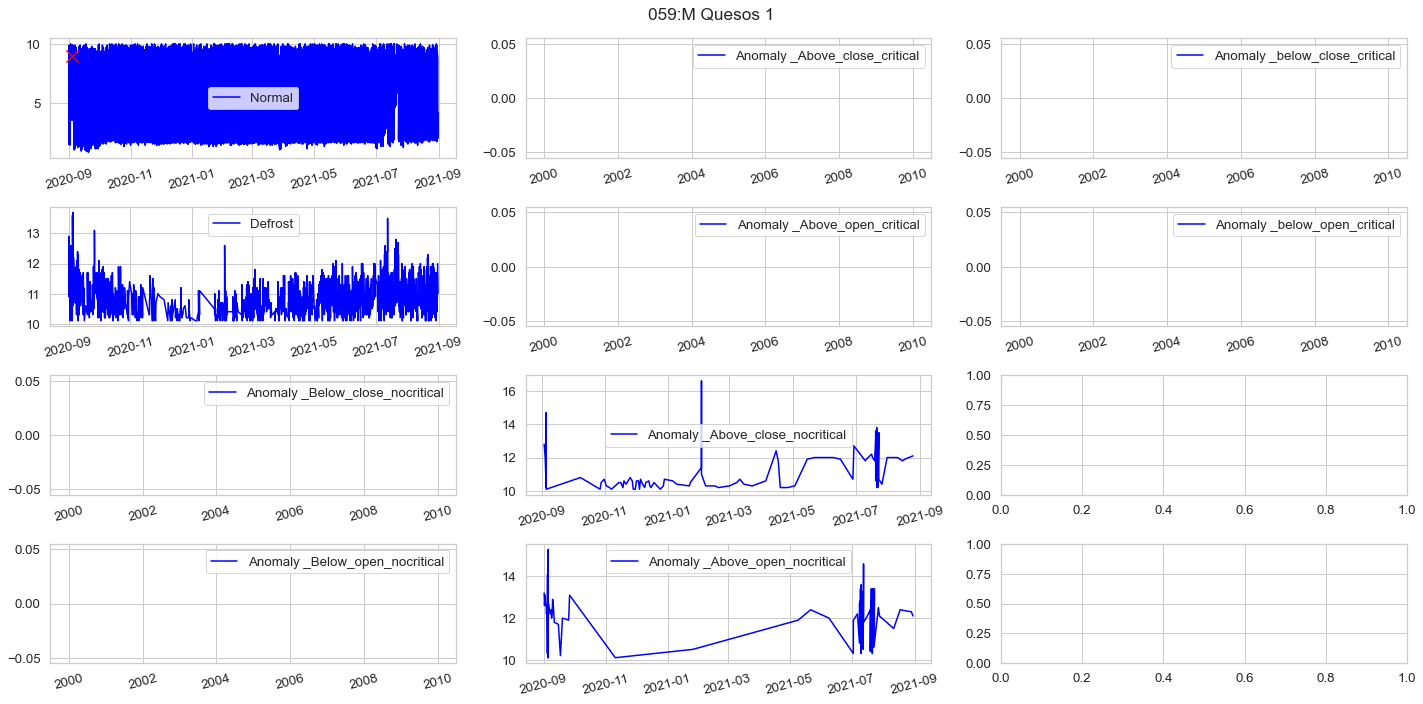

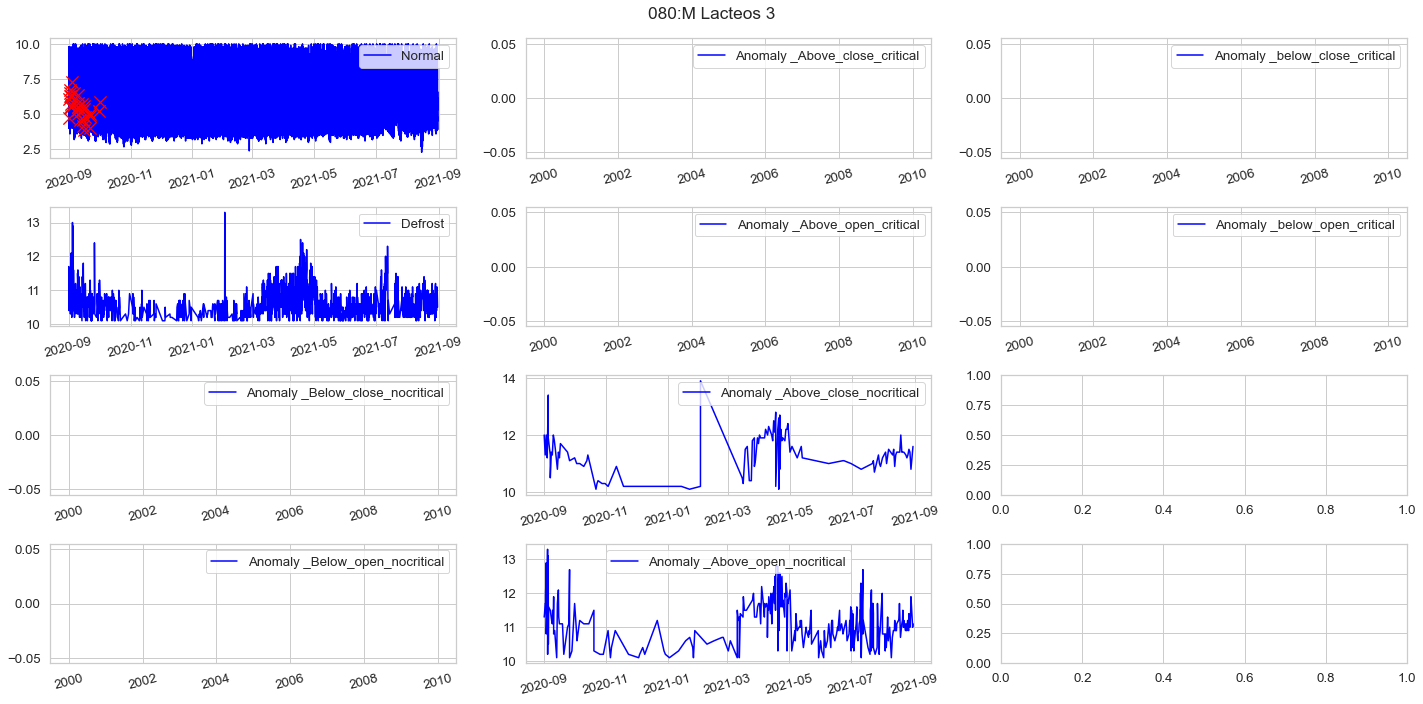

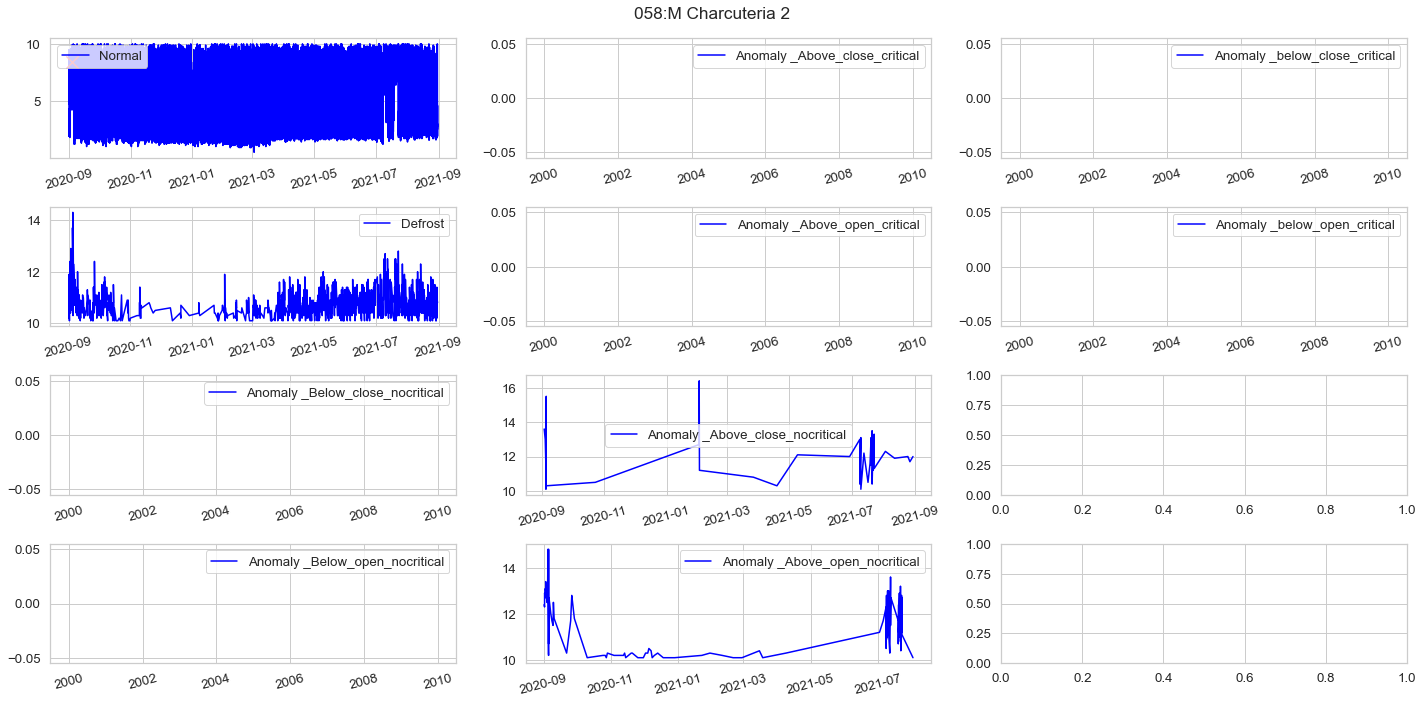

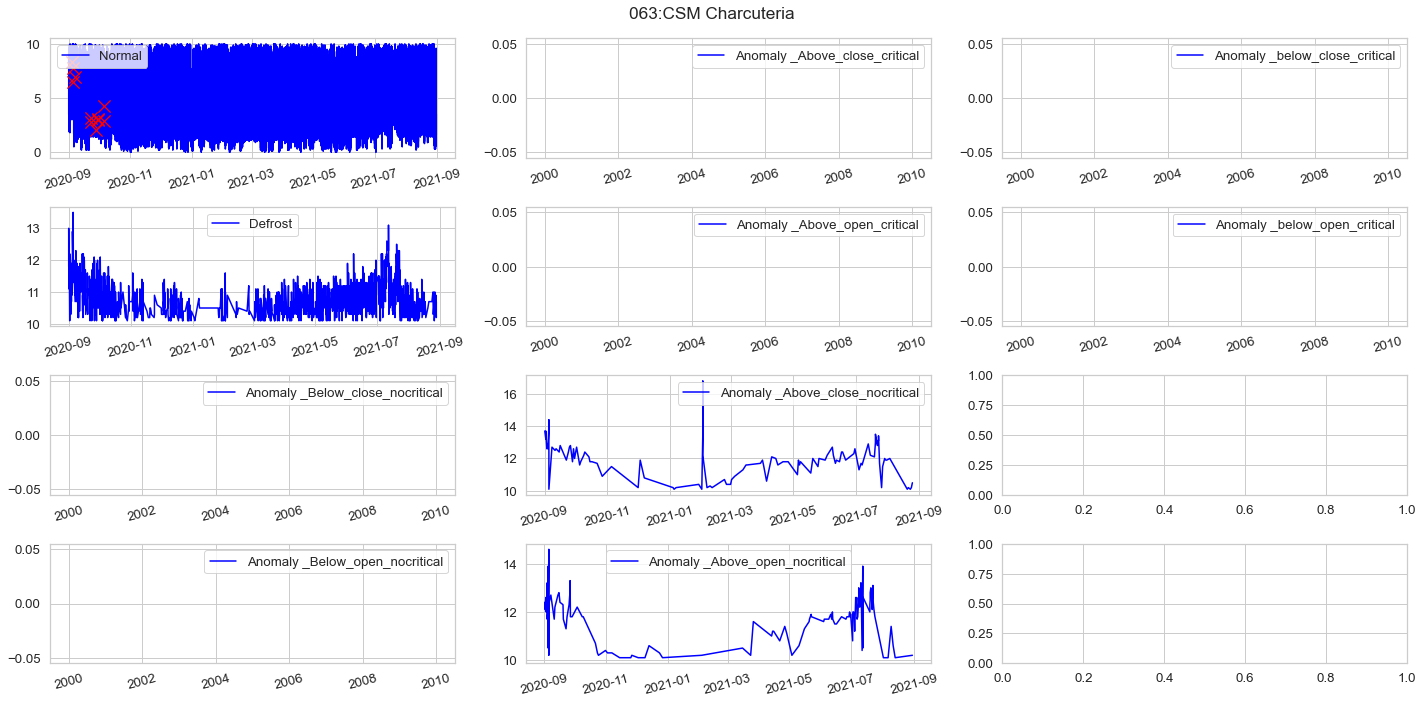

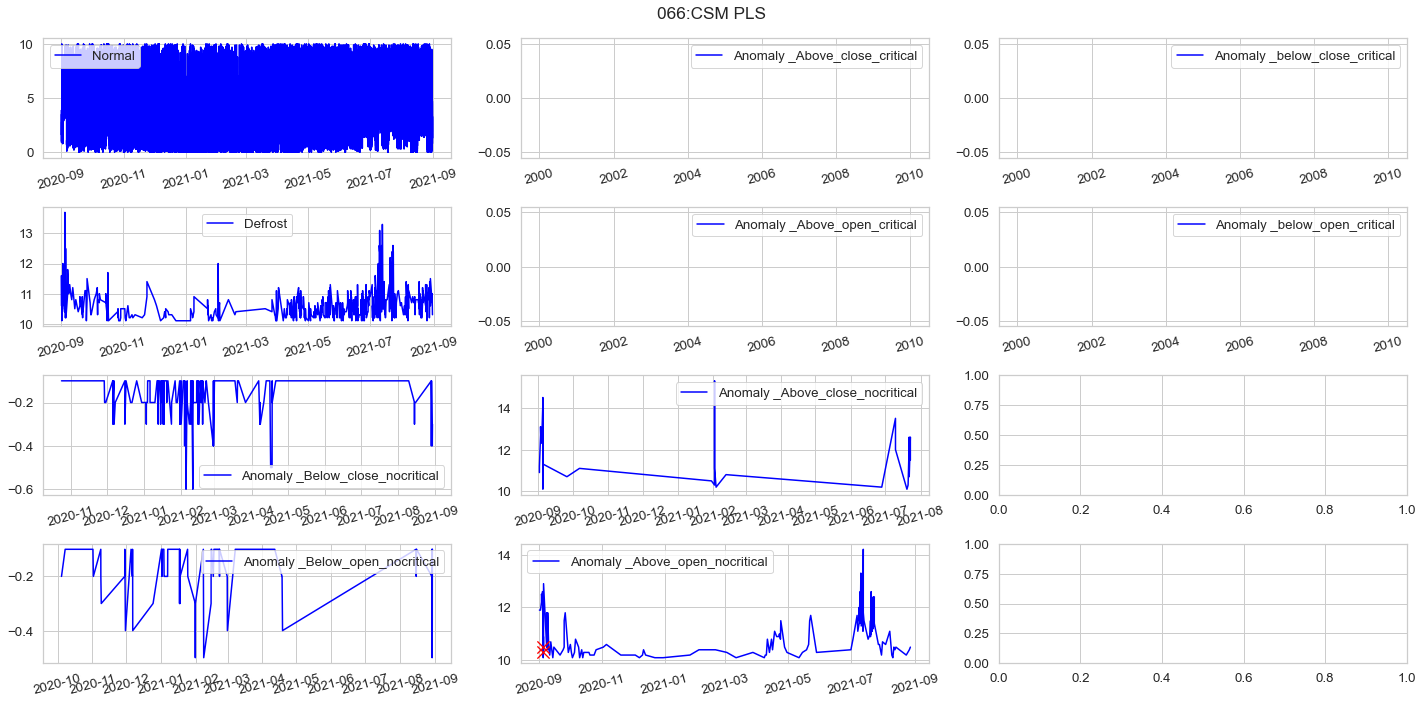

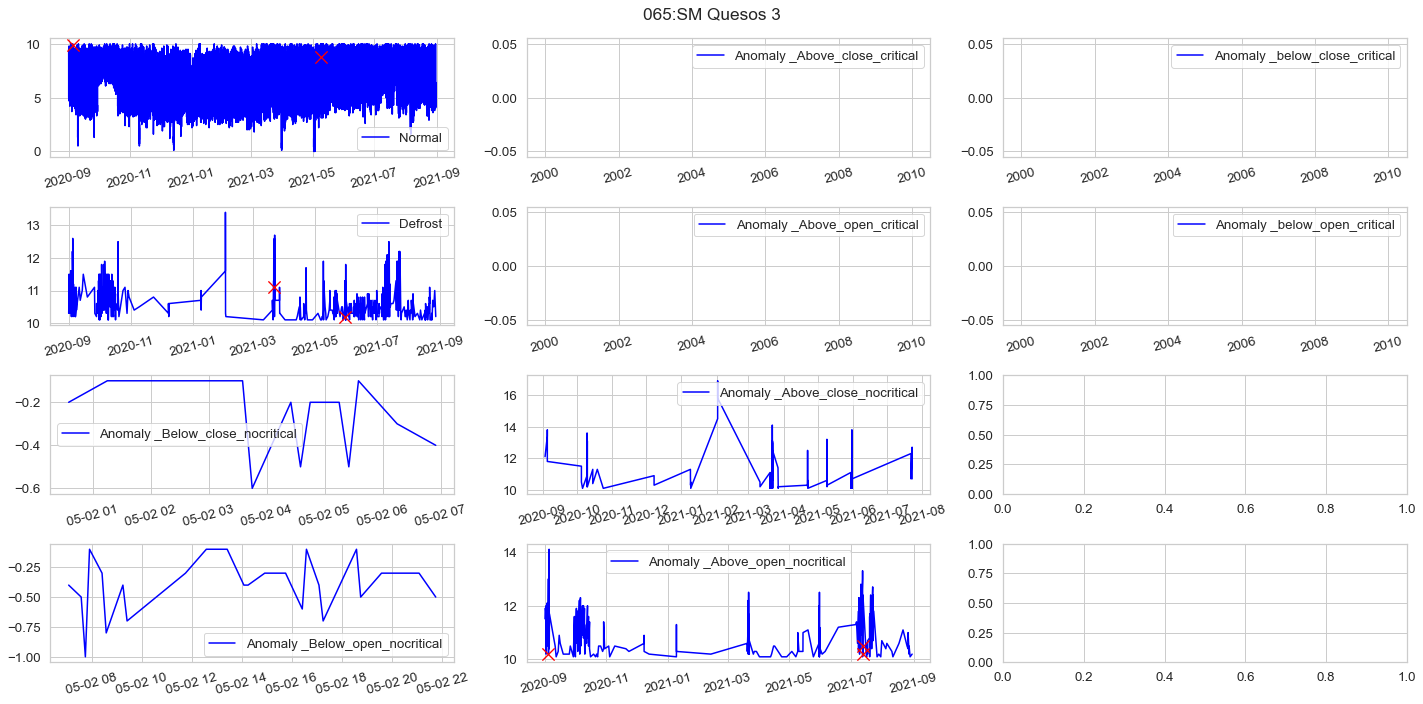

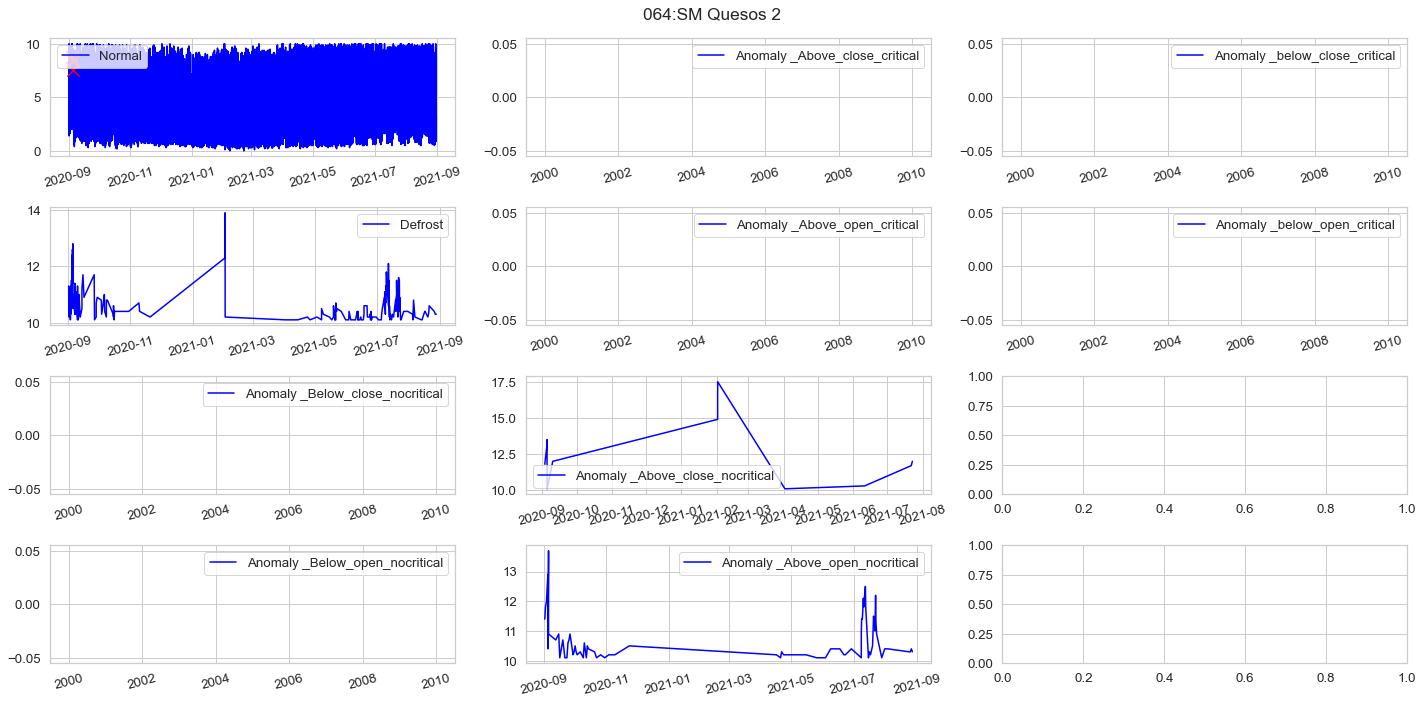

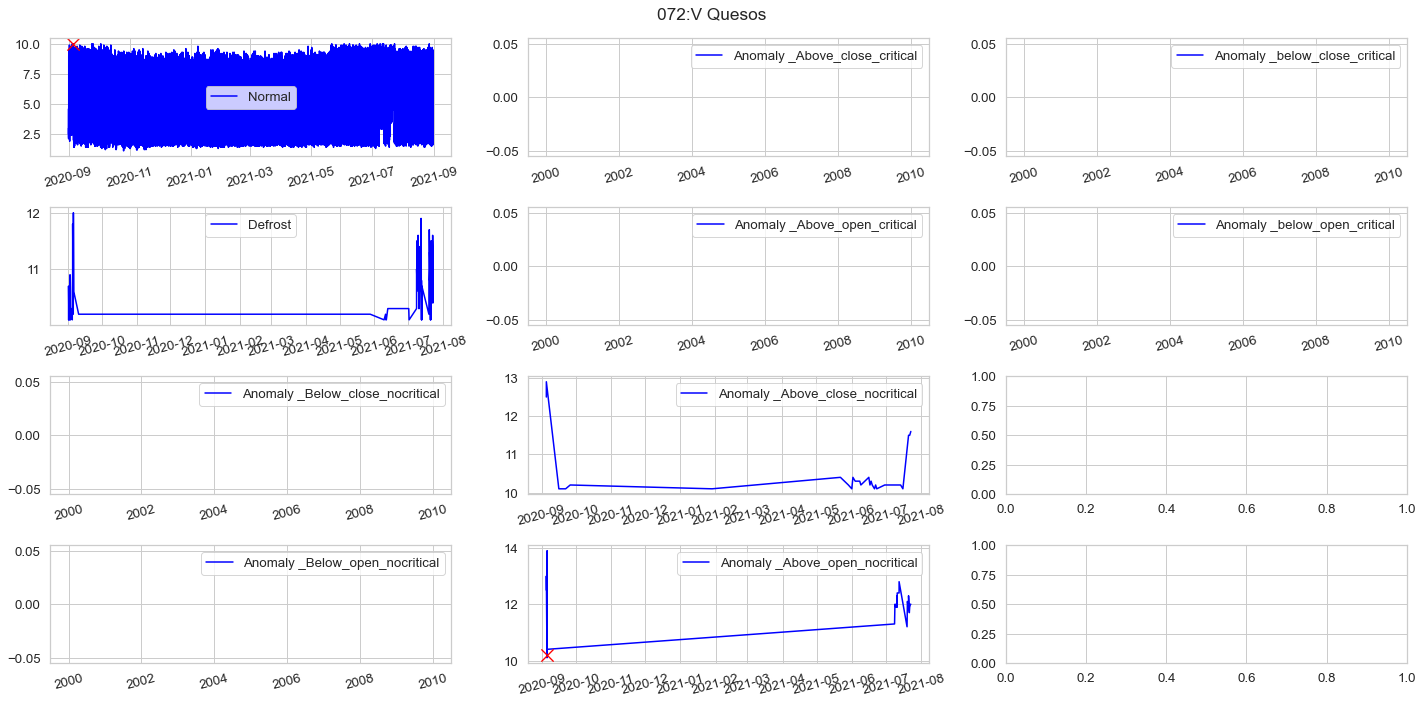

In [86]:
#plot the classes through time
for k,i in enumerate(status):
    # df_above = explore.loc[explore[i]=='Anomaly_Above'].set_index('Timetag') #initial classes
    # df_below = explore.loc[explore[i]=='Anomaly_Below'].set_index('Timetag') #initial classes
    df_defrost = explore.loc[explore[i]=='Defrost'].set_index('Timetag') #intitial classes
    df_normal = explore.loc[explore[i]=='Normal'].set_index('Timetag') #intial classes

    #if more classes
    df_above_close_nocritical = explore.loc[explore[i]=='anomaly_close_above'].set_index('Timetag')
    df_above_open_nocritical = explore.loc[explore[i]=='anomaly_open_above'].set_index('Timetag')
    df_above_close_critical = explore.loc[explore[i]=='anomaly_critical_close_above'].set_index('Timetag')
    df_above_open_critical = explore.loc[explore[i]=='anomaly_critical_open_above'].set_index('Timetag')

    df_below_close_nocritical = explore.loc[explore[i]=='anomaly_close_below'].set_index('Timetag')
    df_below_open_nocritical = explore.loc[explore[i]=='anomaly_open_below'].set_index('Timetag')
    df_below_close_critical = explore.loc[explore[i]=='anomaly_critical_close_below'].set_index('Timetag')
    df_below_open_critical = explore.loc[explore[i]=='anomaly_critical_open_below'].set_index('Timetag')
    
   
    #get asset's temperature
    # df1 = df_above[assets[k]] #intial classes
    # df2 = df_below[assets[k]] #intial classes
    df3 = df_defrost[assets[k]] #intial classes
    df4 = df_normal[assets[k]] #intial classes

    #if more classes
    df5 = df_above_close_nocritical[assets[k]]
    df6 = df_above_open_nocritical[assets[k]]
    df7 = df_above_close_critical[assets[k]]
    df8 = df_above_open_critical[assets[k]]
    df9 = df_below_close_nocritical[assets[k]]
    df10 = df_below_open_nocritical[assets[k]]
    df11 = df_below_close_critical[assets[k]]
    df12 = df_below_open_critical[assets[k]]

    #get the alarms for each status

    # status_alarms_above = pd.merge(df1,empty_alarms[k],right_index=True,left_index=True) #intial classes
    # status_alarms_below = pd.merge(df2,empty_alarms[k],right_index=True,left_index=True) #intial classes
    status_alarms_defrost = pd.merge(df3,empty_alarms[k],right_index=True,left_index=True) #intial classes
    status_alarms_normal = pd.merge(df4,empty_alarms[k],right_index=True,left_index=True) #intial classes


    status_alarms_above_close_nocritical = pd.merge(df5,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_above_open_nocritical = pd.merge(df6,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_above_close_critical = pd.merge(df7,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_above_open_critical = pd.merge(df8,empty_alarms[k],right_index=True,left_index=True)

    status_alarms_below_close_nocritical = pd.merge(df9,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_below_open_nocritical = pd.merge(df10,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_below_close_critical = pd.merge(df11,empty_alarms[k],right_index=True,left_index=True)
    status_alarms_below_open_critical = pd.merge(df12,empty_alarms[k],right_index=True,left_index=True)



    fig,ax = plt.subplots(4,3,figsize=(20,10))
    # ax[0,0].plot(df1.index.values,df1, color='blue',label='Anomaly _Above')#initial classes
    # ax[1,0].plot(df2.index.values,df2, color='blue',label='Anomaly _Below')#initial classes
    ax[0,0].plot(df4.index.values,df4, color='blue',label='Normal') #initial classes
    ax[1,0].plot(df3.index.values,df3, color='blue',label='Defrost')#initial classes
    ax[2,0].plot(df9.index.values,df9, color='blue',label='Anomaly _Below_close_nocritical')
    ax[3,0].plot(df10.index.values,df10, color='blue',label='Anomaly _Below_open_nocritical')

    ax[0,1].plot(df7.index.values,df7, color='blue',label='Anomaly _Above_close_critical')
    ax[1,1].plot(df8.index.values,df8, color='blue',label='Anomaly _Above_open_critical')
    ax[2,1].plot(df5.index.values,df5, color='blue',label='Anomaly _Above_close_nocritical')
    ax[3,1].plot(df6.index.values,df6, color='blue',label='Anomaly _Above_open_nocritical')
    
    ax[0,2].plot(df11.index.values,df11, color='blue',label='Anomaly _below_close_critical')
    ax[1,2].plot(df12.index.values,df12, color='blue',label='Anomaly _below_open_critical')



    

    # ax[0,0].plot(status_alarms_above,linestyle='none', marker='x', color='red', markersize=12)#initial classes
    # ax[1,0].plot(status_alarms_below,linestyle='none', marker='x', color='red', markersize=12) #initial classes
    ax[0,0].plot(status_alarms_normal,linestyle='none', marker='x', color='red', markersize=12)#initial classes
    ax[1,0].plot(status_alarms_defrost,linestyle='none', marker='x', color='red', markersize=12)#initial classes
    ax[2,0].plot(status_alarms_below_close_nocritical, linestyle='none', marker='x', color='red', markersize=12)
    ax[3,0].plot(status_alarms_below_open_nocritical, linestyle='none', marker='x', color='red', markersize=12)

    ax[0,1].plot(status_alarms_above_close_critical, linestyle='none', marker='x', color='red', markersize=12)
    ax[1,1].plot(status_alarms_above_open_critical, linestyle='none', marker='x', color='red', markersize=12)
    ax[2,1].plot(status_alarms_above_close_nocritical, linestyle='none', marker='x', color='red', markersize=12)
    ax[3,1].plot(status_alarms_above_open_nocritical, linestyle='none', marker='x', color='red', markersize=12)
    
    ax[0,2].plot(status_alarms_below_close_critical, linestyle='none', marker='x', color='red', markersize=12)
    ax[1,2].plot(status_alarms_below_open_critical, linestyle='none', marker='x', color='red', markersize=12)

    ax[0,0].legend(loc='best')#initial class
    ax[1,0].legend(loc='best')#initial class
    ax[2,0].legend(loc='best')
    ax[3,0].legend(loc='best')

    ax[0,1].legend(loc='best')#initial class
    ax[1,1].legend(loc='best')#initial class
    ax[2,1].legend(loc='best')
    ax[3,1].legend(loc='best')

    ax[0,2].legend(loc='best')
    ax[1,2].legend(loc='best')
    # ax[2,2].legend(loc='best')    
    # ax[3,2].legend(loc='best')
    
    

    ax[0,0].tick_params(axis='x',labelrotation=15)#initial class
    ax[1,0].tick_params(axis='x',labelrotation=15)#initial class
    ax[2,0].tick_params(axis='x',labelrotation=15)
    ax[3,0].tick_params(axis='x',labelrotation=15)

    ax[0,1].tick_params(axis='x',labelrotation=15)#initial class
    ax[1,1].tick_params(axis='x',labelrotation=15)#initial class
    ax[2,1].tick_params(axis='x',labelrotation=15)
    ax[3,1].tick_params(axis='x',labelrotation=15)

    ax[0,2].tick_params(axis='x',labelrotation=15)
    ax[1,2].tick_params(axis='x',labelrotation=15)
    # ax[2,2].tick_params(axis='x',labelrotation=15)
    # ax[3,2].tick_params(axis='x',labelrotation=15)
    
    
    
    fig.suptitle(assets[k])
    
    fig.tight_layout()
    plt.show()


# Create train dataset

In [ ]:
# train_dummies=(pd.get_dummies(
#     pd.DataFrame(final[status[0]].tolist()), prefix=status[0], prefix_sep='_').groupby(level=0, axis=1).sum())

In [ ]:
# train = pd.merge(final.reset_index(),train_dummies,left_index=True,right_index=True)

In [105]:
# classes = {'Normal':0,
#             'Anomaly_Above':1,
#             'Anomaly_Below':2,
#             'Defrost':3}

classes = {'Normal':0,
            'Defrost':1,
            'anomaly_critical_open_below' :2,  
            'anomaly_critical_close_below':3, 
            'anomaly_open_below':4,               
            'anomaly_close_below':5,    

            'anomaly_critical_open_above':6,     
            'anomaly_critical_close_above':7,                  
            'anomaly_open_above':8,               
            'anomaly_close_above':9
                 }

In [106]:
for i in status:
    final[i] = final[i].replace(classes)

In [107]:
final.head()

057:M Charcuteria 1  open/close  \
Timetag                                                
2020-09-01 00:05:00                  3.7         0.0   
2020-09-01 00:15:00                  2.8         0.0   
2020-09-01 00:25:00                  2.1         0.0   
2020-09-01 00:35:00                  3.2         0.0   
2020-09-01 00:45:00                  3.2         0.0   

                     Consecutive057:M Charcuteria 1  \
Timetag                                               
2020-09-01 00:05:00                             0.0   
2020-09-01 00:15:00                             0.0   
2020-09-01 00:25:00                             0.0   
2020-09-01 00:35:00                             0.0   
2020-09-01 00:45:00                             0.0   

                     Status_057:M Charcuteria 1  \
Timetag                                           
2020-09-01 00:05:00                           0   
2020-09-01 00:15:00                           0   
2020-09-01 00:25:00                           0   
2020-09-01 00:35:00                           0   
2020-09-01 00:45:00                           0   

                     057:M Charcuteria 1:  u16 S4 Air Temp  062:SM Quesos  \
Timetag                                                                     
2020-09-01 00:05:00                                    2.2            0.5   
2020-09-01 00:15:00                                    1.3            2.2   
2020-09-01 00:25:00                                    0.6            5.0   
2020-09-01 00:35:00                                    1.5            6.3   
2020-09-01 00:45:00                                    1.5            7.0   

                     open/close  Consecutive062:SM Quesos  \
Timetag                                                     
2020-09-01 00:05:00         0.0                       0.0   
2020-09-01 00:15:00         0.0                       0.0   
2020-09-01 00:25:00         0.0                       0.0   
2020-09-01 00:35:00         0.0                       0.0   
2020-09-01 00:45:00         0.0                       0.0   

                     Status_062:SM Quesos  062:SM Quesos:  u16 S4 Air Temp  \
Timetag                                                                      
2020-09-01 00:05:00                     0                             -0.4   
2020-09-01 00:15:00                     0                              1.7   
2020-09-01 00:25:00                     0                              4.7   
2020-09-01 00:35:00                     0                              6.1   
2020-09-01 00:45:00                     0                              6.8   

                     ...  064:SM Quesos 2  open/close  \
Timetag              ...                                
2020-09-01 00:05:00  ...              2.7         0.0   
2020-09-01 00:15:00  ...              1.9         0.0   
2020-09-01 00:25:00  ...              3.7         0.0   
2020-09-01 00:35:00  ...              5.9         0.0   
2020-09-01 00:45:00  ...              7.2         0.0   

                     Consecutive064:SM Quesos 2  Status_064:SM Quesos 2  \
Timetag                                                                   
2020-09-01 00:05:00                         0.0                       0   
2020-09-01 00:15:00                         0.0                       0   
2020-09-01 00:25:00                         0.0                       0   
2020-09-01 00:35:00                         0.0                       0   
2020-09-01 00:45:00                         0.0                       0   

                     064:SM Quesos 2:  u16 S4 Air Temp  072:V Quesos  \
Timetag                                                                
2020-09-01 00:05:00                                2.2           2.5   
2020-09-01 00:15:00                                0.8           4.4   
2020-09-01 00:25:00                                3.2           2.7   
2020-09-01 00:35:00                                5.8           2.7   
2020-09-01 

In [ ]:
# dummies =[]
# for i in status:

#     train_dummies=(pd.get_dummies(
#     pd.DataFrame(final[i].tolist()), prefix=i, prefix_sep='_')
#    .groupby(level=0, axis=1)
#    .sum())

#     dummies.append(train_dummies)
#     final.drop(i,axis=1,inplace=True)
    


In [ ]:
# dummies =pd.concat(dummies,axis=1)

In [ ]:
# train =  pd.merge(final.reset_index(),dummies,left_index=True,right_index=True)

In [41]:
# only for the feature extraction function
final = final.loc[:,~final.columns.str.contains('Consecutive',case= False)]
final = final.loc[:,~final.columns.str.contains('Air temp',case= False)]
final = final.loc[:,~final.columns.str.contains('S4S3diff',case= False)]
final = final.loc[:,~final.columns.str.contains('S4S3_State',case= False)]

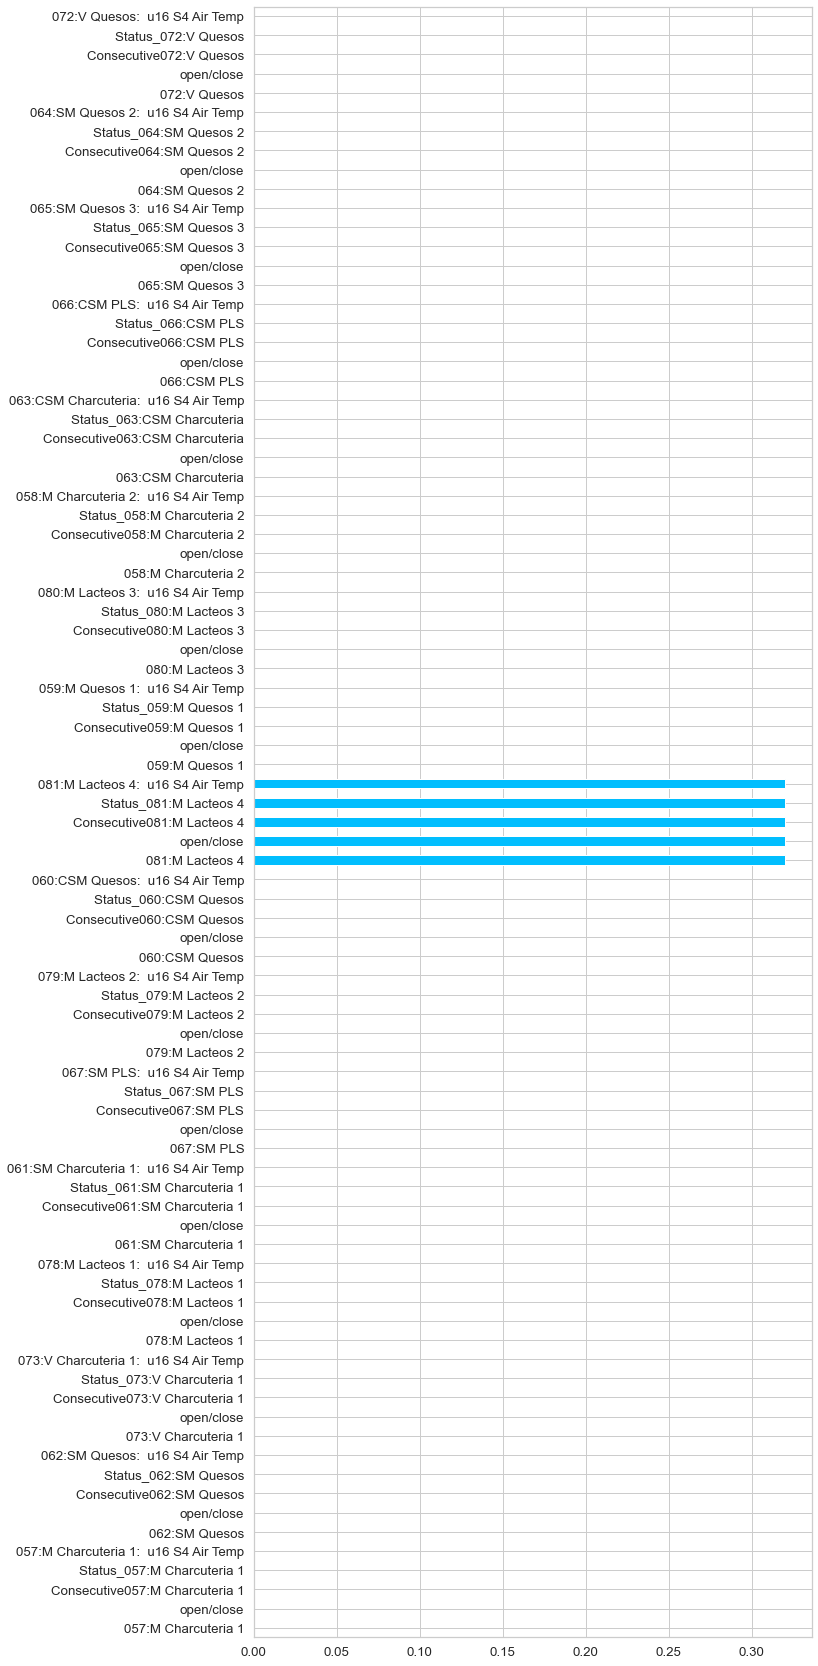

In [108]:
figure =plt.figure(figsize=(10,30))
myutils.missing_values.check_nans(final)
plt.show()

In [109]:
final = myutils.missing_values.fill_nans(final)

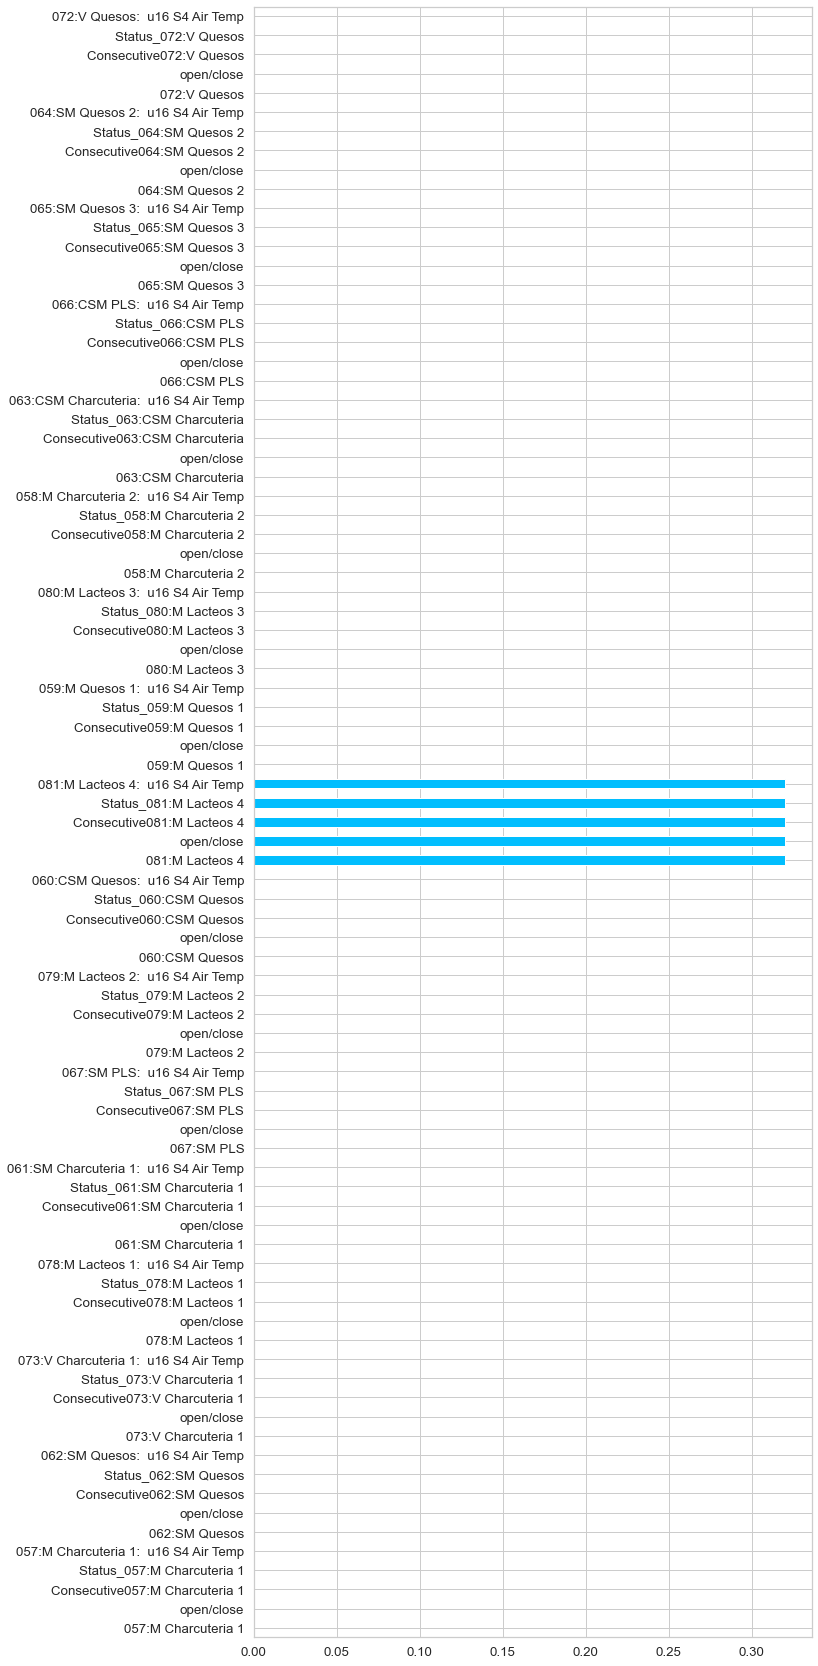

In [110]:
figure =plt.figure(figsize=(10,30))
myutils.missing_values.check_nans(final)
plt.show()

In [111]:
final.shape

(52117, 85)

In [ ]:
#final.to_csv('final_test.csv')

# Training

In [115]:
#choose asset for training
dataset = final.loc[:,final.columns[final.columns.str.contains(assets[6])]]

In [95]:
dataset = dataset.reset_index()

In [89]:
dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].value_counts()

Status_079:M Lacteos 2
Normal                    50446
Defrost                    1207
anomaly_open_above          308
anomaly_close_above         156
dtype: int64

In [116]:
dataset

079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                            
2020-09-01 00:05:00              5.1                         0.0   
2020-09-01 00:15:00              4.7                         0.0   
2020-09-01 00:25:00              4.7                         0.0   
2020-09-01 00:35:00              4.2                         0.0   
2020-09-01 00:45:00              3.9                         0.0   
...                              ...                         ...   
2021-08-30 23:15:00              4.2                         0.0   
2021-08-30 23:25:00              4.9                         0.0   
2021-08-30 23:35:00              4.4                         0.0   
2021-08-30 23:45:00              4.4                         0.0   
2021-08-30 23:55:00              3.8                         0.0   

                     Status_079:M Lacteos 2  079:M Lacteos 2:  u16 S4 Air Temp  
Timetag                                                                         
2020-09-01 00:05:00                       0                                1.2  
2020-09-01 00:15:00                       0                                0.9  
2020-09-01 00:25:00                       0                                0.9  
2020-09-01 00:35:00                       0                                0.0  
2020-09-01 00:45:00                       0                               -0.4  
...                                     ...                                ...  
2021-08-30 23:15:00                       0                                0.0  
2021-08-30 23:25:00                       0                                1.6  
2021-08-30 23:35:00                       0                                0.4  
2021-08-30 23:45:00                       0                                0.1  
2021-08-30 23:55:00                       0                               -0.5  

[52117 rows x 4 columns]

In [77]:
# #dataset = dataset.reset_index()
# inputlabels =['057:M Charcuteria 1'] #[i for i in dataset.columns if 'Status' or 'Timetag' not in i]#[assets[0],'Consecutive010:C.Congelados']
# output =  'Status_'+assets[0]

In [91]:
# output

# Statistical features (used only once for exploration)

In [48]:
from feature_extract import TimeSeriesFeatureEngineering
from preprocess import TimeSeriesPreprocessor
from sklearn.preprocessing import StandardScaler


In [80]:
# preprocessor = TimeSeriesPreprocessor(
#     window_size_seconds = 7200 * 3,
#     window_shift = 300,
#     horizon_shift_seconds = 3600,
#     probe_period_seconds = 300,
#     scaler = StandardScaler())

# series = preprocessor.prepare_series(dataset,
#         input_vars = inputlabels, output_vars = [output],
#         numeric_vars = inputlabels, auto_impute = inputlabels)

In [81]:
#series = series.dropna()

In [96]:
#check the statistical feature work
inputlabels =['079:M Lacteos 2'] #check random asset#[i for i in dataset.columns if 'Status' or 'Timetag' not in i]#[assets[0],'Consecutive010:C.Congelados']
output =  'Status_'+assets[6]
feature_engineering = TimeSeriesFeatureEngineering(
      x_columns = inputlabels ,
      roll_shift = 5,
      ts_variable = 'Timetag',
      y_column = output)

In [97]:
tfresh_features = feature_engineering.make_features(dataset)

Rolling: 100%|██████████| 1/1 [01:20<00:00, 80.77s/it]


(52117,)


In [98]:
tfresh_features

079:M Lacteos 2__sum_values  \
0                              5.1   
1                              4.7   
2                              4.7   
3                              4.2   
4                              3.9   
...                            ...   
52112                          4.2   
52113                          4.9   
52114                          4.4   
52115                          4.4   
52116                          3.8   

       079:M Lacteos 2__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)  \
0                                               0.989093                         
1                                               0.911517                         
2                                               0.911517                         
3                                               0.814547                         
4                                               0.756365                         
...                                                  ...                         
52112                                           0.814547                         
52113                                           0.950305                         
52114                                           0.853335                         
52115                                           0.853335                         
52116                                           0.736971                         

       079:M Lacteos 2__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)  \
0                                               1.398789                         
1                                               1.289080                         
2                                               1.289080                         
3                                               1.151944                         
4                                               1.069662                         
...                                                  ...                         
52112                                           1.151944                         
52113                                           1.343934                         
52114                                           1.206798                         
52115                                           1.206798                         
52116                                           1.042235                         

       079:M Lacteos 2__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)  \
0                                               1.978186                        
1                                               1.823034                        
2                                               1.823034                        
3                                               1.629094                        
4                                               1.512730                        
...                                                  ...                        
52112                                           1.629094                        
52113                                           1.900610                        
52114                                           1.706670                        
52115                                           1.706670                        
52116                                           1.473942                        

       079:M Lacteos 2__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)  \
0                                               3.127786                        
1                                               2.882470                        
2                                               2.882470                        
3                                               2.575824                        
4                                               2.391837                        
...                                                  ...                        
52112                                   

# Final training

In [117]:
#Applying vectorization to get numerical date features
dataset = dataset.reset_index()
dataset['year'] = (dataset['Timetag']).dt.year
dataset['weekday'] = (dataset['Timetag']).dt.weekday  # Define what the numbers of the weekday are
dataset['month'] = (dataset['Timetag']).dt.month
dataset['weekofyear'] =(dataset['Timetag']).dt.weekofyear
dataset['quarter'] =(dataset['Timetag']).dt.quarter
dataset['minute'] =(dataset['Timetag']).dt.minute
dataset['hour'] =(dataset['Timetag']).dt.hour
dataset = dataset.assign(Hour_of_week = lambda x: x.Timetag.map(lambda y: y.dayofweek)*24+x.hour)

dataset['open/close'] = dataset['Timetag'].dt.time.astype(str).apply(lambda x: 0 if x >= '22:00:00' or x <'07:00:00' else 1)
dataset = dataset.set_index('Timetag')
dataset

079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                            
2020-09-01 00:05:00              5.1                         0.0   
2020-09-01 00:15:00              4.7                         0.0   
2020-09-01 00:25:00              4.7                         0.0   
2020-09-01 00:35:00              4.2                         0.0   
2020-09-01 00:45:00              3.9                         0.0   
...                              ...                         ...   
2021-08-30 23:15:00              4.2                         0.0   
2021-08-30 23:25:00              4.9                         0.0   
2021-08-30 23:35:00              4.4                         0.0   
2021-08-30 23:45:00              4.4                         0.0   
2021-08-30 23:55:00              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2020-09-01 00:05:00                       0   
2020-09-01 00:15:00                       0   
2020-09-01 00:25:00                       0   
2020-09-01 00:35:00                       0   
2020-09-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2020-09-01 00:05:00                                1.2  2020        1      9   
2020-09-01 00:15:00                                0.9  2020        1      9   
2020-09-01 00:25:00                                0.9  2020        1      9   
2020-09-01 00:35:00                                0.0  2020        1      9   
2020-09-01 00:45:00                               -0.4  2020        1      9   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2020-09-01 00:05:00          36        3       5     0            24   
2020-09-01 00:15:00          36        3      15     0            24   
2020-09-01 00:25:00          36        3      25     0            24   
2020-09-01 00:35:00          36        3      35     0            24   
2020-09-01 00:45:00          36        3      45     0            24   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  
Timetag                          
2020-09-01 00:05:00           0  
2020-09-01 00:15:00           0  
2020-09-01 00:25:00           0  
2020-09-01 00:35:00           0  
2020-09-01 00:45:00           0  
...                         ...  
2021-08-30 23:15:00           0  
2021-08-30 23:25:00           0  
2021-08-30 23:35:00           0  
2021-08-30 23:45:00           0  
2021-08-30 23:55:00           0  

[52117 rows x 13 columns]

In [ ]:
#dataset.to_csv("Data\Processed\Dataset.csv",index=False, header=False)

In [83]:
dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].value_counts()

Status_079:M Lacteos 2
0                         50446
1                          1207
8                           308
9                           156
dtype: int64

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn import svm
from sklearn.model_selection import (GridSearchCV,KFold,cross_val_score)
from sklearn.metrics import (auc, average_precision_score,
                             classification_report, confusion_matrix, f1_score,
                             precision_recall_curve,
                             precision_recall_fscore_support, precision_score,
                             recall_score, roc_curve)
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier



In [118]:
test = dataset.reset_index()
test_sample= test[test['Timetag']>='2021-08-01']
test = test_sample.set_index('Timetag')
test

079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                            
2021-08-01 00:05:00              4.0                         0.0   
2021-08-01 00:15:00              6.2                         0.0   
2021-08-01 00:25:00              4.9                         0.0   
2021-08-01 00:35:00              3.9                         0.0   
2021-08-01 00:45:00              5.6                         0.0   
...                              ...                         ...   
2021-08-30 23:15:00              4.2                         0.0   
2021-08-30 23:25:00              4.9                         0.0   
2021-08-30 23:35:00              4.4                         0.0   
2021-08-30 23:45:00              4.4                         0.0   
2021-08-30 23:55:00              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2021-08-01 00:05:00                       0   
2021-08-01 00:15:00                       0   
2021-08-01 00:25:00                       0   
2021-08-01 00:35:00                       0   
2021-08-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2021-08-01 00:05:00                                0.9  2021        6      8   
2021-08-01 00:15:00                                4.1  2021        6      8   
2021-08-01 00:25:00                                2.0  2021        6      8   
2021-08-01 00:35:00                                1.1  2021        6      8   
2021-08-01 00:45:00                                3.6  2021        6      8   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2021-08-01 00:05:00          30        3       5     0           144   
2021-08-01 00:15:00          30        3      15     0           144   
2021-08-01 00:25:00          30        3      25     0           144   
2021-08-01 00:35:00          30        3      35     0           144   
2021-08-01 00:45:00          30        3      45     0           144   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  
Timetag                          
2021-08-01 00:05:00           0  
2021-08-01 00:15:00           0  
2021-08-01 00:25:00           0  
2021-08-01 00:35:00           0  
2021-08-01 00:45:00           0  
...                         ...  
2021-08-30 23:15:00           0  
2021-08-30 23:25:00           0  
2021-08-30 23:35:00           0  
2021-08-30 23:45:00           0  
2021-08-30 23:55:00           0  

[4320 rows x 13 columns]

In [117]:
dataset = dataset.reset_index()
dataset = dataset[dataset['Timetag']<='2021-07-31']
dataset = dataset.set_index('Timetag')


In [ ]:
#dataset.to_csv('tain_example.csv')

In [118]:
def training_dataset(dataset):
    train_test_split_ratio = 0.2
    train_valid_split_ratio = 0.2
    seed = 42
    
    X = dataset.drop(dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]],axis=1).values
    y = dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].astype(int).values

    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=train_test_split_ratio, random_state = seed,stratify=y)
    #X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = train_valid_split_ratio, random_state = seed,stratify=y_train)
    return X_train, X_valid,y_train, y_valid#, y_test

In [119]:
X_train, X_valid, y_train, y_valid = training_dataset(dataset)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(38122, 12)
(38122, 1)
(9531, 12)
(9531, 1)


In [121]:
X_test = test.drop(test.loc[:,test.columns[test.columns.str.contains('Status')]],axis=1).values
y_test = test.loc[:,test.columns[test.columns.str.contains('Status')]].astype(int).values

In [122]:
print(X_test.shape)
print(y_test.shape)

(4320, 12)
(4320, 1)


In [123]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [ ]:
# pca = PCA()

# X_train = pca.fit_transform(X_train) 
# X_valid = pca.fit_transform(X_valid)
# X_test =pca.fit_transform(X_test) 

In [ ]:
# pca.explained_variance_

In [ ]:
# features = range(pca.n_components_)
# _ = plt.figure(figsize=(22,5))
# _ = plt.bar(features, pca.explained_variance_)
# _ = plt.xlabel('PCA feature')
# _ = plt.ylabel('Variance')
# _ = plt.xticks(features)
# _ = plt.title('Importance of the principal Components based on inertia')
# plt.show()

# SVM

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.93      0.98      0.95        91
           8       0.97      0.88      0.92        41
           9       0.93      0.87      0.90        15

    accuracy                           1.00      9531
   macro avg       0.96      0.93      0.94      9531
weighted avg       1.00      1.00      1.00      9531



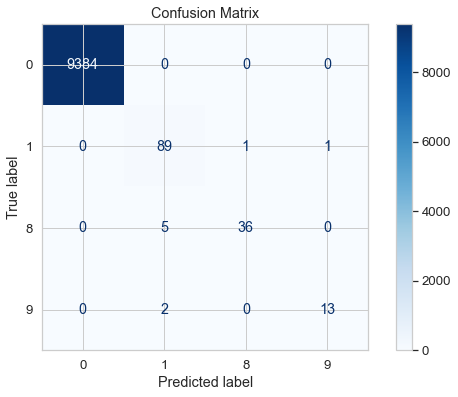

In [124]:
# defining parameter range 
# param_grid = {'C': [0.1, 1, 10],  
#                 'gamma': [1, 0.1, 0.01, 0.001], 
#                 'gamma':['scale', 'auto'],
#                 'kernel': ['linear','rbf']}
# svm = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=5)
SVM = svm.SVC(kernel='linear')
#model = LogisticRegression()
SVM.fit(X_train,y_train)

#print(model.best_params_)
SVM_predictions = SVM.predict(X_valid)


print(classification_report(y_valid,SVM_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( SVM, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')


In [ ]:
# def make_meshgrid(x, y, h=.02):
#     x_min, x_max = x.min() - 1, x.max() + 1
#     y_min, y_max = y.min() - 1, y.max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     return xx, yy

# def plot_contours(ax, clf, xx, yy, **params):
#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     out = ax.contourf(xx, yy, Z, **params)
#     return out

In [ ]:
# fig, ax = plt.subplots()
# # title for the plots
# title = ('Decision surface of linear SVC ')
# # Set-up grid for plotting.
# X0, X1 = X_train[:, 0], X_train[:, 1]
# xx, yy = make_meshgrid(X0, X1)

# plot_contours(ax, svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
# ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# ax.set_ylabel('y label here')
# ax.set_xlabel('x label here')
# ax.set_xticks(())
# ax.set_yticks(())
# ax.set_title(title)
# ax.legend()
# plt.show()

# Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.96      0.99      0.97        91
           8       0.97      0.93      0.95        41
           9       1.00      0.93      0.97        15

    accuracy                           1.00      9531
   macro avg       0.98      0.96      0.97      9531
weighted avg       1.00      1.00      1.00      9531



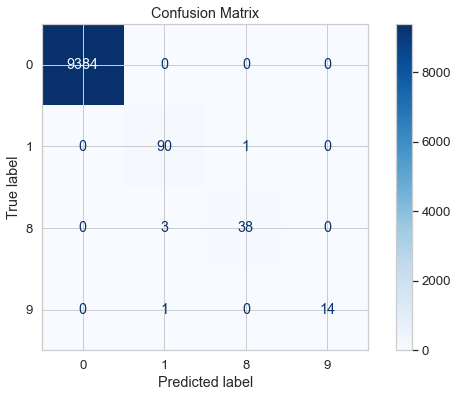

In [125]:
# param_grid = {'n_estimators': [50, 100, 120, 150],  
#                 'criterion': ['gini','entropy'], 
#                 'max_depth':[100,200,300]
#                 }
# RF = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=5)
RF = RandomForestClassifier(n_estimators=120,criterion='entropy',max_depth=100) #best parameters
RF.fit(X_train,y_train)

#print(RF.best_params_)
RF_predictions = RF.predict(X_valid)


print(classification_report(y_valid,RF_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( RF, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')


In [ ]:
#f1_score(y_valid,grid_predictions,average=None).mean()

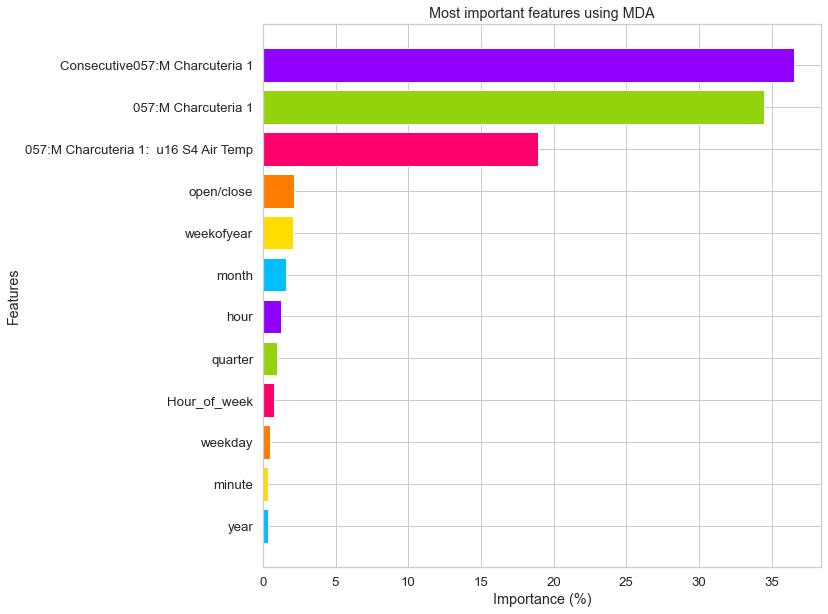

In [126]:
fig =plt.figure(figsize=(10,10))
X = dataset.drop(dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]],axis=1)
importance = RF.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
   # print('{}-{:.2f}%'.format(X.columns[index], (importance[index] *100.0)))
    plt.barh(X.columns[index], (importance[index] *100.0))
    plt.title('Most important features using MDA')
    plt.xlabel('Importance (%)')
    plt.ylabel('Features')
plt.show()


# ANN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.94      0.99      0.96        91
           8       0.97      0.88      0.92        41
           9       1.00      0.93      0.97        15

    accuracy                           1.00      9531
   macro avg       0.98      0.95      0.96      9531
weighted avg       1.00      1.00      1.00      9531



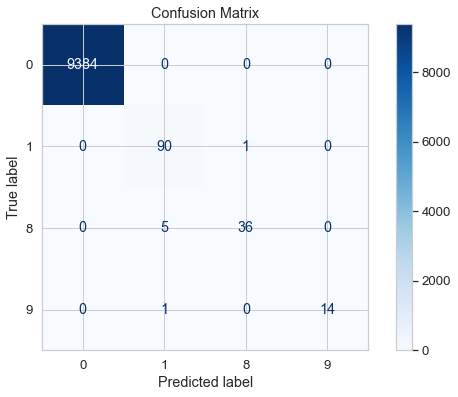

In [131]:
# param_grid = {'hidden_layer_sizes': [50, 100, 120, 150],  
#                 'learning_rate_init': [0.1,0.01,0.001], 
#                 'solver':['lbfgs', 'sgd', 'adam']
#                 }
# ANN = GridSearchCV(MLPClassifier(), param_grid, refit = True, verbose = 3,n_jobs=5)
ANN = MLPClassifier(hidden_layer_sizes= 50, learning_rate_init= 0.01, solver ='adam')
ANN.fit(X_train,y_train)

#print(ANN.best_params_)
ANN_predictions = ANN.predict(X_valid)


print(classification_report(y_valid,ANN_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( ANN, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')

# KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9384
           1       0.86      0.74      0.79        91
           8       0.85      0.85      0.85        41
           9       1.00      0.80      0.89        15

    accuracy                           1.00      9531
   macro avg       0.93      0.85      0.88      9531
weighted avg       1.00      1.00      1.00      9531



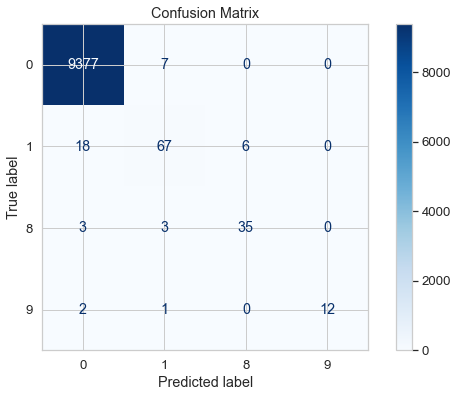

In [128]:
# param_grid = {'n_neighbors': [5, 10],  
#                 'leaf_size': [20,30,40], 
#                 'algorithm':['auto', 'ball_tree', 'kd_tree']
#                 }
#KNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3,n_jobs=5)
KNN = KNeighborsClassifier(algorithm ='auto', leaf_size = 20, n_neighbors= 5)
KNN.fit(X_train,y_train)

#print(KNN.best_params_)
KNN_predictions = KNN.predict(X_valid)


print(classification_report(y_valid,KNN_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( KNN, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')

In [132]:
models=[]
models.append(('SVM',SVM_predictions))
models.append(('RF',RF_predictions))
models.append(('ANN',ANN_predictions))
models.append(('KNN',KNN_predictions))

results =pd.DataFrame(columns=['Algorithm','F1_mean'])

In [133]:
i=0
for name, preds in models:

    f1_scores = f1_score(y_valid,preds, average=None).mean()
    results.loc[i]=[name,f1_scores]
    i+=1
    
print(results)


  Algorithm   F1_mean
0       SVM  0.942875
1        RF  0.972123
2       ANN  0.962790
3       KNN  0.883462


In [94]:
model = results['Algorithm'].loc[results['F1_mean']== max(results['F1_mean'])]
model

3    KNN
Name: Algorithm, dtype: object

# OverSampling SMOTE

In [95]:
final_classes = pd.DataFrame(dataset.loc[:,dataset.columns[dataset.columns.str.contains('Status')]].value_counts()).to_dict('dict')
final_classes[0]

{(0.0,): 25608, (8.0,): 125, (1.0,): 120, (9.0,): 62}

In [96]:
strategy = {}
#for i in range(len(strategy[0])):
for keys,values in final_classes[0].items():
    if keys[0]==0:
        strategy[int(keys[0])]=int(values)
    else:
        strategy[int(keys[0])]=int(values)+15000

        #strat[i].append(keys[0])

strategy

{0: 25608, 8: 15125, 1: 15120, 9: 15062}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5122
           1       0.69      0.92      0.79        24
           8       0.77      0.40      0.53        25
           9       0.50      0.67      0.57        12

    accuracy                           1.00      5183
   macro avg       0.74      0.75      0.72      5183
weighted avg       1.00      1.00      1.00      5183



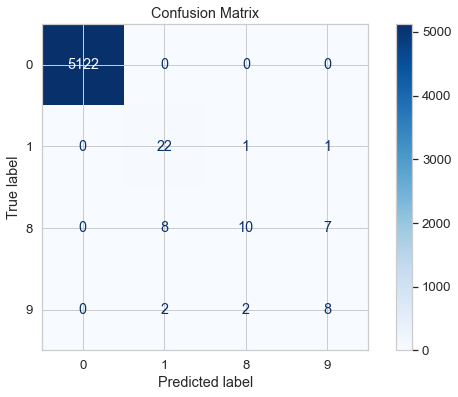

In [98]:
# strategy = {0:33130,
#             1:15000,
#             2:10000,  
#             3:15000, 
#             6:12000,     
#             7:15000,                  
#             8:15000,               
#             9:20000
#                  }
X_upsampled, y_upsampled = feature_engineering.class_imbalance_fix(X_train, y_train, sampling=strategy)
KNN.fit(X_upsampled,y_upsampled)

#print(model.best_params_)
grid_predictions = KNN.predict(X_valid)


print(classification_report(y_valid,grid_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( KNN, X_valid, y_valid, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')


# Testing 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4134
           1       0.99      1.00      0.99       134
           8       1.00      0.96      0.98        28
           9       1.00      0.96      0.98        24

    accuracy                           1.00      4320
   macro avg       1.00      0.98      0.99      4320
weighted avg       1.00      1.00      1.00      4320



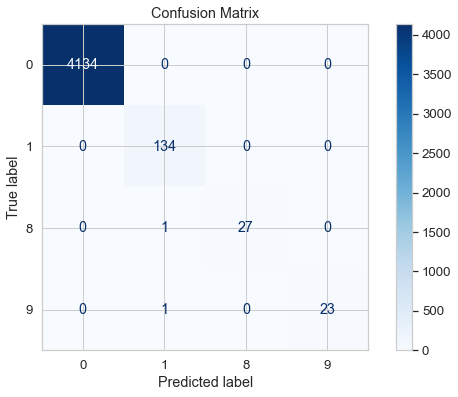

In [105]:
test_predictions = SVM.predict(X_test)
print(classification_report(y_test,test_predictions))

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_confusion_matrix( SVM, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
_ = ax.set_title('Confusion Matrix')

# End result

In [106]:
predictions = pd.DataFrame(test_predictions,columns=['predictions'])
predictions

predictions
0               0
1               0
2               0
3               0
4               0
...           ...
4315            0
4316            0
4317            0
4318            0
4319            0

[4320 rows x 1 columns]

In [107]:
pred = predictions.merge(test.reset_index(), right_index=True,left_index=True)

In [108]:
pred['test']='test'
pred =pred.set_index('Timetag')
pred

predictions  079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                                         
2021-08-01 00:05:00            0              4.0                         0.0   
2021-08-01 00:15:00            0              6.2                         0.0   
2021-08-01 00:25:00            0              4.9                         0.0   
2021-08-01 00:35:00            0              3.9                         0.0   
2021-08-01 00:45:00            0              5.6                         0.0   
...                          ...              ...                         ...   
2021-08-30 23:15:00            0              4.2                         0.0   
2021-08-30 23:25:00            0              4.9                         0.0   
2021-08-30 23:35:00            0              4.4                         0.0   
2021-08-30 23:45:00            0              4.4                         0.0   
2021-08-30 23:55:00            0              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2021-08-01 00:05:00                       0   
2021-08-01 00:15:00                       0   
2021-08-01 00:25:00                       0   
2021-08-01 00:35:00                       0   
2021-08-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2021-08-01 00:05:00                                0.9  2021        6      8   
2021-08-01 00:15:00                                4.1  2021        6      8   
2021-08-01 00:25:00                                2.0  2021        6      8   
2021-08-01 00:35:00                                1.1  2021        6      8   
2021-08-01 00:45:00                                3.6  2021        6      8   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2021-08-01 00:05:00          30        3       5     0           144   
2021-08-01 00:15:00          30        3      15     0           144   
2021-08-01 00:25:00          30        3      25     0           144   
2021-08-01 00:35:00          30        3      35     0           144   
2021-08-01 00:45:00          30        3      45     0           144   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  test  
Timetag                                
2021-08-01 00:05:00           0  test  
2021-08-01 00:15:00           0  test  
2021-08-01 00:25:00           0  test  
2021-08-01 00:35:00           0  test  
2021-08-01 00:45:00           0  test  
...                         ...   ...  
2021-08-30 23:15:00           0  test  
2021-08-30 23:25:

In [109]:
final_show = pd.concat([dataset,pred],axis=0)

In [110]:

final_show

079:M Lacteos 2  Consecutive079:M Lacteos 2  \
Timetag                                                            
2020-09-01 00:05:00              5.1                         0.0   
2020-09-01 00:15:00              4.7                         0.0   
2020-09-01 00:25:00              4.7                         0.0   
2020-09-01 00:35:00              4.2                         0.0   
2020-09-01 00:45:00              3.9                         0.0   
...                              ...                         ...   
2021-08-30 23:15:00              4.2                         0.0   
2021-08-30 23:25:00              4.9                         0.0   
2021-08-30 23:35:00              4.4                         0.0   
2021-08-30 23:45:00              4.4                         0.0   
2021-08-30 23:55:00              3.8                         0.0   

                     Status_079:M Lacteos 2  \
Timetag                                       
2020-09-01 00:05:00                       0   
2020-09-01 00:15:00                       0   
2020-09-01 00:25:00                       0   
2020-09-01 00:35:00                       0   
2020-09-01 00:45:00                       0   
...                                     ...   
2021-08-30 23:15:00                       0   
2021-08-30 23:25:00                       0   
2021-08-30 23:35:00                       0   
2021-08-30 23:45:00                       0   
2021-08-30 23:55:00                       0   

                     079:M Lacteos 2:  u16 S4 Air Temp  year  weekday  month  \
Timetag                                                                        
2020-09-01 00:05:00                                1.2  2020        1      9   
2020-09-01 00:15:00                                0.9  2020        1      9   
2020-09-01 00:25:00                                0.9  2020        1      9   
2020-09-01 00:35:00                                0.0  2020        1      9   
2020-09-01 00:45:00                               -0.4  2020        1      9   
...                                                ...   ...      ...    ...   
2021-08-30 23:15:00                                0.0  2021        0      8   
2021-08-30 23:25:00                                1.6  2021        0      8   
2021-08-30 23:35:00                                0.4  2021        0      8   
2021-08-30 23:45:00                                0.1  2021        0      8   
2021-08-30 23:55:00                               -0.5  2021        0      8   

                     weekofyear  quarter  minute  hour  Hour_of_week  \
Timetag                                                                
2020-09-01 00:05:00          36        3       5     0            24   
2020-09-01 00:15:00          36        3      15     0            24   
2020-09-01 00:25:00          36        3      25     0            24   
2020-09-01 00:35:00          36        3      35     0            24   
2020-09-01 00:45:00          36        3      45     0            24   
...                         ...      ...     ...   ...           ...   
2021-08-30 23:15:00          35        3      15    23            23   
2021-08-30 23:25:00          35        3      25    23            23   
2021-08-30 23:35:00          35        3      35    23            23   
2021-08-30 23:45:00          35        3      45    23            23   
2021-08-30 23:55:00          35        3      55    23            23   

                     open/close  predictions  test  
Timetag                                             
2020-09-01 00:05:00           0          NaN   NaN  
2020-09-01 00:15:00           0          NaN   NaN  
2020-09-01 00:25:00           0          NaN   NaN  
2020-09-01 00:35:00           0          NaN   NaN  
2020-09-01 00:45:00           0          NaN   NaN  
...                         ...          ...   ...  
2021-08-30 23:15:00           0          0.0  test  
2021-08-30 23:25:00           0          0.0  test  
2021-08-30 23:35

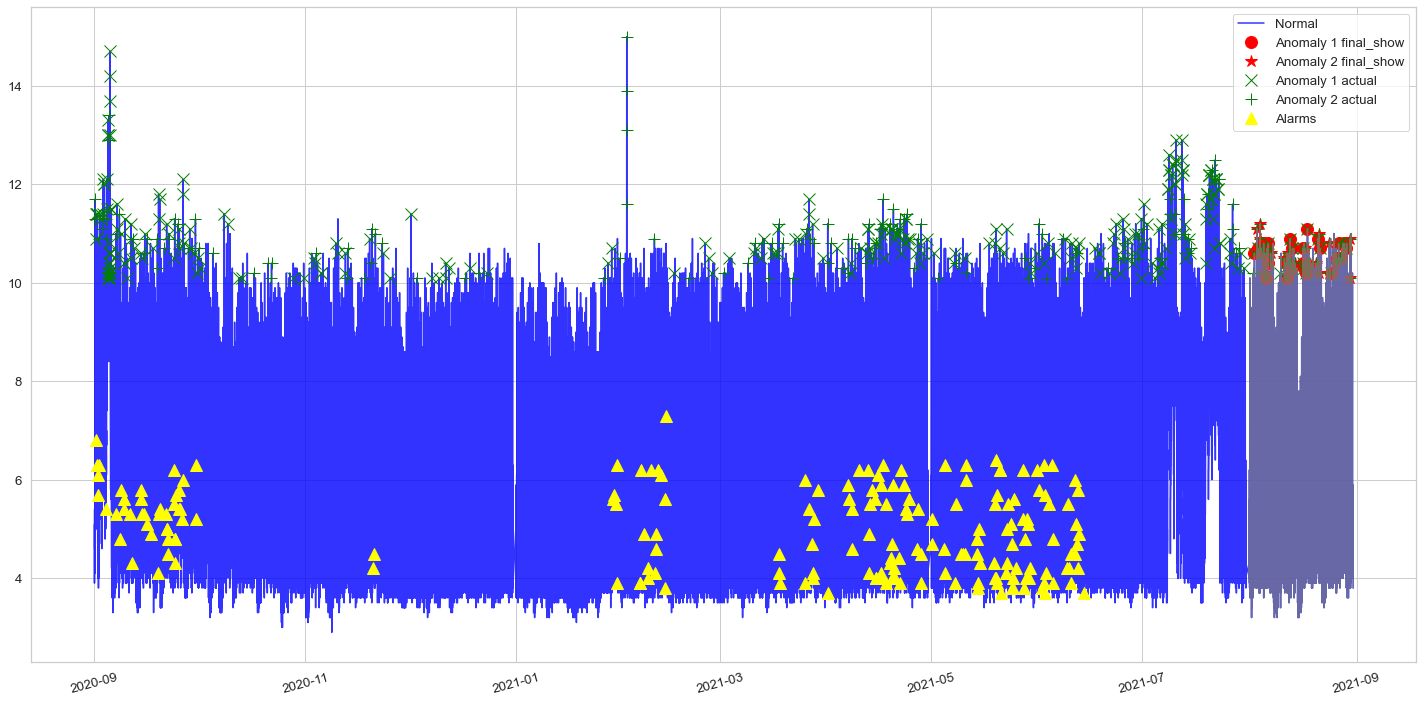

In [111]:
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(final_show.index.values,final_show.iloc[:,0], color='blue',label='Normal', alpha=0.8) #initial classes
    
ax.plot(final_show[final_show['predictions']==8].iloc[:,0],linestyle='none', marker='o', color='red', markersize=12,label='Anomaly 1 final_show')#initial classes
ax.plot(final_show[final_show['predictions']==9].iloc[:,0],linestyle='none', marker='*', color='red', markersize=12,label='Anomaly 2 final_show')#initial classes

ax.plot(final_show[final_show['Status_079:M Lacteos 2']==8].iloc[:,0], linestyle='none', marker='x', color='green', markersize=12,label='Anomaly 1 actual')#initial classes
ax.plot(final_show[final_show['Status_079:M Lacteos 2']==9].iloc[:,0],linestyle='none', marker='+', color='green', markersize=12,label='Anomaly 2 actual')#initial classes
ax.plot(empty_alarms[6].iloc[:,0],linestyle='none', marker='^', color='yellow', markersize=12,label='Alarms')#initial classes
ax.plot(final_show[final_show['test']=='test'].iloc[:,0],color='grey', alpha=0.7)

ax.legend(loc='best')    
ax.tick_params(axis='x',labelrotation=15)
    
fig.tight_layout()
plt.show()